# EGT305 Big Data Assignment - Developed & Created by Sai Keerthan (232594T)

**Business Context**:
Government organisation would like to know the status of the job market in the country. 

**Project Objectives**:
Tasked me with: 
1. exploring the data from a survey and provide findings to the government organisation
2. Building a ML Model to predict the salary of a person based on his features. 

**Dataset Provided**:
1. `Employee_dataset.csv`
2. `Employee_salaries.csv`

**The Entire Zip Archive can also be found in my GitHub Repository:**
[GitHub Repository Link](https://github.com/saikeerthan06/BigData-Assignment)


## Import Packages:

In [1]:
# system level imports
import sys
import os
import json, math, argparse
from pathlib import Path
import time

# data manipulation and visualization libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # might not use due to size of the dataset

# modelling | Machine Learning libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, RobustScaler, TargetEncoder, FunctionTransformer, SplineTransformer, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import loguniform, randint, uniform
import xgboost as xgb
# --------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import clone
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoostRegressor, Pool



# supress any warnings
import warnings

warnings.filterwarnings("ignore") # filter out the warnings


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Initialise the CWD and Dataset Paths

In [2]:
# get the current working directory and print it out 

print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment


In [3]:
# instantiate both the dataset paths 

employee_df = os.path.join(os.getcwd(), "Employee_dataset.csv")
salary_df = os.path.join(os.getcwd(), "Employee_salaries.csv")

In [4]:
if employee_df and salary_df:
    print(f"Employee Dataset Path: {employee_df}")
    print(f"Salary Dataset Path: {salary_df}")
else:
    print("Dataset paths are not set correctly.")

Employee Dataset Path: /Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment/Employee_dataset.csv
Salary Dataset Path: /Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment/Employee_salaries.csv


The dataset paths have been correctly instantiated, we will now proceed onto the preliminary Data Exploration

## Non-PySpark Data Cleaning & Modelling:

### Exploratory Data Analysis

In [5]:
# allow pandas to read df 
employee_df = pd.read_csv(employee_df)
salary_df = pd.read_csv(salary_df)

In [6]:
# show employee df 

employee_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0


In [7]:
# show the data about the employee df 

print("Current size of the Employee Dataset: ", employee_df.shape)
print("\n")
print("Current Dtypes of the Employee Dataset: \n", employee_df.dtypes)
print("\n")

Current size of the Employee Dataset:  (1000000, 8)


Current Dtypes of the Employee Dataset: 
 jobId               object
companyId           object
jobRole             object
education           object
major               object
industry            object
yearsExperience    float64
distanceFromCBD    float64
dtype: object




We will do the same for `Employee_salaries.csv`

In [8]:
salary_df

,jobId,salaryInThousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0
...,...,...
999995,JOB1362685407682,88.0
999996,JOB1362685407683,160.0
999997,JOB1362685407684,64.0
999998,JOB1362685407685,149.0


In [9]:
# show the data about the employee df 

print("Current size of the Salary Dataset: ", salary_df.shape)
print("\n")
print("Current Dtypes of the Salary Dataset: \n", salary_df.dtypes)
print("\n")

Current size of the Salary Dataset:  (1000000, 2)


Current Dtypes of the Salary Dataset: 
 jobId                 object
salaryInThousands    float64
dtype: object




We will have to merge the datasets together, however, before we merge, we will clean each data individually, and then merge together as we do not want to bring out the unclean data and merge them together. The process will flow like this: 

1. Basic Cleaning for each dataset first 
2. More complicated cleaning (if needed) on the merged dataset. 

### Data Cleaning

#### `Employee_dataset.csv`

#### Missing Values & Duplicates

In [10]:
# print out the missing values in the employee df
print("Missing Values in Employee Dataset: \n", employee_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Employee Dataset: {employee_df.isnull().sum().sum()}")

Missing Values in Employee Dataset: 
 jobId              105
companyId          148
jobRole            165
education          186
major              207
industry           214
yearsExperience    198
distanceFromCBD    166
dtype: int64


Sum of the missing values in the Employee Dataset: 1389


In [11]:
# calculate the percentage of missing values against the entire size of the df 
missing_percentage = (employee_df.isnull().sum() / employee_df.shape[0]) * 100
print("Percentage of Missing Values in Employee Dataset: \n", missing_percentage)

Percentage of Missing Values in Employee Dataset: 
 jobId              0.0105
companyId          0.0148
jobRole            0.0165
education          0.0186
major              0.0207
industry           0.0214
yearsExperience    0.0198
distanceFromCBD    0.0166
dtype: float64


Since the loss of data is negligible, we will drop these missing values 

In [12]:
# drop missing values in employee df 
employee_df.dropna(inplace=True)

# print out the missing values in the employee df after dropping the missing values
print("Missing Values in Employee Dataset after dropping: \n", employee_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Employee Dataset after dropping: {employee_df.isnull().sum().sum()}")

Missing Values in Employee Dataset after dropping: 
 jobId              0
companyId          0
jobRole            0
education          0
major              0
industry           0
yearsExperience    0
distanceFromCBD    0
dtype: int64


Sum of the missing values in the Employee Dataset after dropping: 0


The dataset now does not have any missing values, we will no move onto seeing if there are any duplicates

In [13]:
# check for duplicates in the employee df
duplicates = employee_df.duplicated().sum()
print(f"Number of duplicate rows in the Employee Dataset: {duplicates}")

Number of duplicate rows in the Employee Dataset: 0


In [14]:
employee_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
10,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24.0,30.0
11,JOB1362684407698,COMP7,CEO,MASTERS,PHYSICS,EDUCATION,7.0,79.0
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8.0,29.0
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0


With this, the basic cleaning has been finished for the `Employee_dataset.csv`, we will now move onto doing the basic cleaning for the `Employee_salaries.csv`

#### `Employee_salaries.csv`

In [15]:
# check for missing values in the salary df
print("Missing Values in Salary Dataset: \n", salary_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Salary Dataset: {salary_df.isnull().sum().sum()}")

Missing Values in Salary Dataset: 
 jobId                223
salaryInThousands    229
dtype: int64


Sum of the missing values in the Salary Dataset: 452


In [16]:
# calculate the percentage of missing values against the entire size of the df 
missing_percentage = (salary_df.isnull().sum() / salary_df.shape[0]) * 100
print("Percentage of Missing Values in Employee Dataset: \n", missing_percentage)

Percentage of Missing Values in Employee Dataset: 
 jobId                0.0223
salaryInThousands    0.0229
dtype: float64


Similar to `Employee_dataset.csv`, the percentage is negligible due to the vast amount of data present in the df, therefore it is safe to drop these missing values without risking any data loss or integrity

In [17]:
# drop missing values in salary df 
salary_df.dropna(inplace=True)
# print out the missing values in the salary df after dropping the missing values
print("Missing Values in Salary Dataset after dropping: \n", salary_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Salary Dataset after dropping: {salary_df.isnull().sum().sum()}")

Missing Values in Salary Dataset after dropping: 
 jobId                0
salaryInThousands    0
dtype: int64


Sum of the missing values in the Salary Dataset after dropping: 0


Missing values have been removed from the salary df, now it's time to check for duplicates in the salary df 

In [18]:
# check for duplicates in the employee df
duplicates = employee_df.duplicated().sum()
print(f"Number of duplicate rows in the Employee Dataset: {duplicates}")

Number of duplicate rows in the Employee Dataset: 0


Similarly, there is no duplicated values in the Salary df, this concludes basic cleaning for both the datasets

There is still more cleaning do to (Checking for outliers, structural errors), but it is better to merge the dataset first than perform more advanced cleaning. Here is the justification: 

1. Contextual Outlier Detection
	•	Outliers are often only apparent when you have all relevant fields together.
	•	Example: A salary might look reasonable in isolation, but is an outlier when paired with a junior job title or low years of experience.

2. Cross-Feature Consistency Checks
	•	Advanced cleaning often requires comparing values across multiple columns, which may only exist after merging.
	•	Example: Ensuring education level aligns with jobRole or that industry matches salaryInThousands.

3. Category Normalization
	•	Harmonizing category labels (like job roles, majors, industries) is easier once you have the full combined set of categories from both datasets.

4. Avoiding Premature Data Loss
	•	Cleaning before merging can lead to removing data that would otherwise be valid in context.
	•	Example: A value might appear as an outlier in one dataset but is justified when paired with a field from the other dataset.

5. Efficient Error Detection
	•	Structural errors and inconsistencies, such as duplicate jobId rows with conflicting information, become much more visible post-merge.


However, before we merge, there might be some jobIds which are present in `Employee_salaries.csv` which are not present in `Employee_dataset.csv`, therefore it is best we check which jobIds match and then merge because: 

When merging two datasets, it is generally best to keep only those records (rows) where the `jobId` appears in both dataframes. This is typically done using an `inner join`. Here’s why:

- **Ensures Complete Data:**  
  Merging only on matching `jobId`s guarantees that each row in the merged dataset has both employee details and salary information. This leads to a dataset where every record is fully usable for analysis.

- **Prevents Unnecessary Missing Values:**  
  Including rows where the `jobId` is missing from one side introduces missing values (`NaN`) in important columns. These incomplete records add complexity and can lower the quality of subsequent analyses.

- **Simplifies Downstream Processing:**  
  A merged dataset without extraneous missing values is easier to clean, analyze, and use for machine learning.

Therefore, we will now check the matching jobIds

In [19]:
# create sets for both the datasets to check if there are any common columns
salary_ids = set(salary_df['jobId'])
employee_ids = set(employee_df['jobId'])

# find the rows in salary which are not present in employee 
id_in_salary = salary_ids - employee_ids

# present numbers 
print(f"Number of jobIds in Salary Dataset not present in Employee Dataset: {len(id_in_salary)}")

Number of jobIds in Salary Dataset not present in Employee Dataset: 297


In [20]:
# show the rows in salary df which are not present in employee df
salary_not_in_employee = salary_df[salary_df['jobId'].isin(id_in_salary)]
print("Rows in Salary Dataset not present in Employee Dataset: \n", salary_not_in_employee)

Rows in Salary Dataset not present in Employee Dataset: 
                    jobId  salaryInThousands
2       JOB1362684407689              137.0
3       JOB1362684407690              142.0
4       JOB1362684407691              163.0
5       JOB1362684407692              113.0
53      JOB1362684407740              193.0
...                  ...                ...
999809  JOB1362685407496              116.0
999846  JOB1362685407533              104.0
999847  JOB1362685407534              152.0
999848  JOB1362685407535              168.0
999868  JOB1362685407555              129.0

[297 rows x 2 columns]


Since the rows which are in `Employee_salaries.csv` and not in `Employee_dataset.csv` are not so much as compared to the overall size of the salary df, it is safe to drop them

In [21]:
# drops the rows in salary df which are not present in employee df
salary_df = salary_df[~salary_df['jobId'].isin(id_in_salary)]
salary_df = salary_df.reset_index(drop=True)

print("Salary Dataset after dropping rows not present in Employee Dataset: \n", salary_df.head())

Salary Dataset after dropping rows not present in Employee Dataset: 
               jobId  salaryInThousands
0  JOB1362684407687              130.0
1  JOB1362684407688              101.0
2  JOB1362684407697              102.0
3  JOB1362684407698              144.0
4  JOB1362684407699               79.0


In [22]:
salary_df

,jobId,salaryInThousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407697,102.0
3,JOB1362684407698,144.0
4,JOB1362684407699,79.0
...,...,...
999469,JOB1362685407682,88.0
999470,JOB1362685407683,160.0
999471,JOB1362685407684,64.0
999472,JOB1362685407685,149.0


To ensure each record in our merged dataset has both employee details and salary information, we remove salary records whose `jobId` does not exist in the employee dataset. Since this represents a very small fraction of the data, it will not significantly affect our analysis, and helps avoid missing values and incomplete records later on.

We can now join both datasets to have a `master_df.csv`!

In [23]:
master_df = pd.merge(employee_df, salary_df, on='jobId', how='inner')

print("Master Dataset after merging Employee and Salary Datasets: \n", master_df.head())

Master Dataset after merging Employee and Salary Datasets: 
               jobId companyId  jobRole    education    major   industry  \
0  JOB1362684407687    COMP37      CFO      MASTERS     MATH     HEALTH   
1  JOB1362684407688    COMP19      CEO  HIGH_SCHOOL     NONE        WEB   
2  JOB1362684407697    COMP56  JANITOR  HIGH_SCHOOL     NONE     HEALTH   
3  JOB1362684407698     COMP7      CEO      MASTERS  PHYSICS  EDUCATION   
4  JOB1362684407699     COMP4   JUNIOR         NONE     NONE        OIL   

   yearsExperience  distanceFromCBD  salaryInThousands  
0             10.0             83.0              130.0  
1              3.0             73.0              101.0  
2             24.0             30.0              102.0  
3              7.0             79.0              144.0  
4              8.0             29.0               79.0  


In [24]:
# print data about the master df
print("Current size of the Master Dataset: ", master_df.shape)
print("\n")
print("Current Dtypes of the Master Dataset: \n", master_df.dtypes)
print("\n")
master_df

Current size of the Master Dataset:  (999474, 9)


Current Dtypes of the Master Dataset: 
 jobId                 object
companyId             object
jobRole               object
education             object
major                 object
industry              object
yearsExperience      float64
distanceFromCBD      float64
salaryInThousands    float64
dtype: object




,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24.0,30.0,102.0
3,JOB1362684407698,COMP7,CEO,MASTERS,PHYSICS,EDUCATION,7.0,79.0,144.0
4,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999469,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0,88.0
999470,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0,160.0
999471,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0,64.0
999472,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0,149.0


In [25]:
master_df.to_csv("master_df.csv")

#### `master_df.csv`

In [26]:
# check for missing values in the master df 
print("Missing Values in Master Dataset: \n", master_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Master Dataset: {master_df.isnull().sum().sum()}")

Missing Values in Master Dataset: 
 jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
dtype: int64


Sum of the missing values in the Master Dataset: 0


No Missing values in the master dataset, let us now see for duplicates

In [27]:
# duplicates in the master df
print("Number of duplicate rows in the Master Dataset: ", master_df.duplicated().sum())

Number of duplicate rows in the Master Dataset:  0


Basic Cleaning for the Master Dataset is done, we will now move onto printing out the executive summary to perform more complex cleaning (fixing structural errors, outliers)

In [28]:
# print unique summary for master dataset
executive_summary = pd.DataFrame({
    "column": master_df.columns,
    "num_unique": [master_df[c].nunique(dropna=False) for c in master_df.columns],
    "example_values": [master_df[c].unique()[:10] for c in master_df.columns]  # Show first 10 unique values
})
executive_summary

,column,num_unique,example_values
0,jobId,999474,"[JOB1362684407687, JOB1362684407688, JOB136268..."
1,companyId,63,"[COMP37, COMP19, COMP56, COMP7, COMP4, COMP54,..."
2,jobRole,9,"[CFO, CEO, JANITOR, JUNIOR, CTO, VICE_PRESIDEN..."
3,education,5,"[MASTERS, HIGH_SCHOOL, NONE, BACHELORS, DOCTORAL]"
4,major,9,"[MATH, NONE, PHYSICS, BIOLOGY, LITERATURE, CHE..."
5,industry,8,"[HEALTH, WEB, EDUCATION, OIL, FINANCE, AUTO, S..."
6,yearsExperience,25,"[10.0, 3.0, 24.0, 7.0, 8.0, 21.0, 13.0, 1.0, 2..."
7,distanceFromCBD,102,"[83.0, 73.0, 30.0, 79.0, 29.0, 26.0, 81.0, 8.0..."
8,salaryInThousands,281,"[130.0, 101.0, 102.0, 144.0, 79.0, 193.0, 47.0..."


We have printed out the executive summary to gain a overview of the columns and their unique values, now, we will narrow down to clean the most relevant columns first

##### `jobRole` Column Cleaning

In [29]:
# ensure proper capitalisation of the column 
master_df['jobRole'] = master_df['jobRole'].str.lower().str.strip()

master_df['jobRole'].unique()

array(['cfo', 'ceo', 'janitor', 'junior', 'cto', 'vice_president',
       'senior', 'manager', 'president'], dtype=object)

##### Check the Value Distribution

In [30]:
print(master_df['jobRole'].value_counts())

jobRole
senior            125830
vice_president    125168
manager           125062
cto               124986
janitor           124909
ceo               124703
junior            124519
cfo               124296
president              1
Name: count, dtype: int64


The `president` column looks suspicious, as there is so much more entires for `vice_president`, let us investigate

In [31]:
# Display the row(s) with 'president'
master_df[master_df['jobRole'] == 'president']

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
935203,JOB1362685343310,COMP0,president,NONE,NONE,GOVERNMENT,1.0,1.0,81.0


In [32]:
# print out values with COMP0 as companyID in the df 
master_df[(master_df['companyId'] == 'COMP0')]


,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
23,JOB1362684407718,COMP0,cfo,BACHELORS,PHYSICS,HEALTH,18.0,32.0,132.0
216,JOB1362684407924,COMP0,cfo,MASTERS,MATH,EDUCATION,20.0,20.0,180.0
269,JOB1362684407980,COMP0,cfo,DOCTORAL,LITERATURE,EDUCATION,8.0,83.0,101.0
286,JOB1362684407997,COMP0,senior,BACHELORS,CHEMISTRY,EDUCATION,17.0,97.0,86.0
315,JOB1362684408026,COMP0,janitor,HIGH_SCHOOL,NONE,WEB,21.0,1.0,163.0
...,...,...,...,...,...,...,...,...,...
999175,JOB1362685407377,COMP0,ceo,HIGH_SCHOOL,NONE,FINANCE,22.0,32.0,183.0
999184,JOB1362685407386,COMP0,manager,NONE,NONE,OIL,15.0,14.0,104.0
999270,JOB1362685407475,COMP0,vice_president,MASTERS,BUSINESS,EDUCATION,24.0,52.0,131.0
999287,JOB1362685407492,COMP0,janitor,NONE,NONE,WEB,5.0,1.0,82.0


This president entry is very suspicious, as it does not make sense for the president to make lesser money than the vice president, with only one year of experience

In [33]:
# Drop the row where jobRole is 'president'
master_df = master_df[master_df['jobRole'] != 'president']

master_df = master_df.reset_index(drop=True)

In [34]:
# Confirm it's been deleted
print(master_df['jobRole'].unique())
print(master_df['jobRole'].value_counts())

['cfo' 'ceo' 'janitor' 'junior' 'cto' 'vice_president' 'senior' 'manager']
jobRole
senior            125830
vice_president    125168
manager           125062
cto               124986
janitor           124909
ceo               124703
junior            124519
cfo               124296
Name: count, dtype: int64


With that out of the way, let us continue on with finding out even more outliers in the jobRole with specific roles

In [35]:
# Find janitors with unusually high salaries
high_salary_janitors = master_df[(master_df['jobRole'] == 'janitor') & (master_df['salaryInThousands'] > 200)]
print(high_salary_janitors)

Empty DataFrame
Columns: [jobId, companyId, jobRole, education, major, industry, yearsExperience, distanceFromCBD, salaryInThousands]
Index: []


In [36]:

# Find executives (ceo, cfo, cto) with very low yearsExperience
junior_execs = master_df[
    (master_df['jobRole'].isin(['ceo', 'cfo', 'cto'])) &
    (master_df['yearsExperience'] < 2)
]
junior_execs

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
56,JOB1362684407753,COMP15,cto,HIGH_SCHOOL,NONE,WEB,1.0,13.0,96.0
103,JOB1362684407802,COMP44,cfo,HIGH_SCHOOL,NONE,HEALTH,1.0,34.0,99.0
115,JOB1362684407817,COMP29,cto,DOCTORAL,ENGINEERING,AUTO,1.0,96.0,146.0
160,JOB1362684407862,COMP5,cfo,NONE,NONE,WEB,0.0,31.0,123.0
176,JOB1362684407878,COMP41,ceo,NONE,NONE,FINANCE,1.0,99.0,93.0
...,...,...,...,...,...,...,...,...,...
999157,JOB1362685407360,COMP26,cfo,BACHELORS,PHYSICS,AUTO,0.0,68.0,91.0
999243,JOB1362685407449,COMP26,cfo,HIGH_SCHOOL,NONE,HEALTH,0.0,59.0,103.0
999394,JOB1362685407608,COMP12,ceo,DOCTORAL,NONE,WEB,1.0,57.0,177.0
999401,JOB1362685407615,COMP57,cfo,DOCTORAL,MATH,WEB,0.0,29.0,162.0


##### `education` Column Cleaning

In [37]:
print(master_df['education'].unique())

['MASTERS' 'HIGH_SCHOOL' 'NONE' 'BACHELORS' 'DOCTORAL']


In [38]:
master_df['education'] = master_df['education'].str.strip().str.lower()

In [39]:
print(master_df['education'].unique())

['masters' 'high_school' 'none' 'bachelors' 'doctoral']


In [40]:
print(master_df['education'].value_counts())

education
high_school    236862
none           236714
bachelors      175405
doctoral       175271
masters        175221
Name: count, dtype: int64


##### `major` Column Cleaning

In [41]:
print(master_df['major'].unique())

['MATH' 'NONE' 'PHYSICS' 'BIOLOGY' 'LITERATURE' 'CHEMISTRY' 'COMPSCI'
 'BUSINESS' 'ENGINEERING']


In [42]:
master_df['major'] = master_df['major'].str.strip().str.lower()

In [43]:
print(master_df['major'].unique())

['math' 'none' 'physics' 'biology' 'literature' 'chemistry' 'compsci'
 'business' 'engineering']


In [44]:
print(master_df['major'].value_counts())

major
none           532060
chemistry       58841
literature      58644
engineering     58568
business        58498
physics         58381
compsci         58352
biology         58351
math            57778
Name: count, dtype: int64


In [45]:
pd.crosstab(master_df['education'], master_df['major'])

major,biology,business,chemistry,compsci,engineering,literature,math,none,physics
education,,,,,,,,,
bachelors,19610,19450,19672,19567,19664,19409,19254,19484,19295
doctoral,19395,19534,19567,19318,19417,19577,19351,19705,19407
high_school,0,0,0,0,0,0,0,236862,0
masters,19346,19514,19602,19467,19487,19658,19173,19295,19679
none,0,0,0,0,0,0,0,236714,0


To ensure data consistency, we checked the relationship between `major` and `education` using a crosstab. All non-tertiary education levels (`high_school` and `none`) only have 'none' as their major, while higher education levels have valid fields of study as majors. This confirms that the columns are logically consistent and well-cleaned.

In [46]:
# check for entires where there is no education but there is a major, as these two usually are intertwined. 

edu_major_filter1 = master_df[(master_df['education'] == "none") & (master_df["major"] != "none")]

edu_major_filter1

# the result below shows that there is no such entries where there is no education but there is no major 

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands


##### `industry` column

In [47]:
print(master_df['industry'].unique())

['HEALTH' 'WEB' 'EDUCATION' 'OIL' 'FINANCE' 'AUTO' 'SERVICE']


In [48]:
master_df['industry'] = master_df['industry'].str.strip().str.lower()

In [49]:
print(master_df['industry'].unique())

['health' 'web' 'education' 'oil' 'finance' 'auto' 'service']


In [50]:
print(master_df['industry'].value_counts())

industry
web          143141
auto         142878
finance      142798
education    142736
oil          142689
health       142674
service      142557
Name: count, dtype: int64


In [51]:
print(master_df['industry'].isnull().sum())

0


- Listed all unique values to check for typos, synonyms, and formatting inconsistencies.
- Standardized formatting for clarity and consistency.
- Checked value distribution for rare or suspicious entries.
- Handled any missing or unusual categories if needed.

##### `yearsExperience` Column Cleaning

In [52]:
print(master_df['yearsExperience'].describe())


count    999473.000000
mean         11.992349
std           7.212440
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          24.000000
Name: yearsExperience, dtype: float64


In [53]:
print("Negative values:", (master_df['yearsExperience'] < 0).sum())

Negative values: 0


In [54]:
print("Zero years:", (master_df['yearsExperience'] == 0).sum())

Zero years: 39822


In [55]:
print("Missing:", master_df['yearsExperience'].isnull().sum())

Missing: 0


In [56]:
print("Top 10 values:", master_df['yearsExperience'].value_counts().head(10))

Top 10 values: yearsExperience
15.0    40298
1.0     40248
9.0     40222
3.0     40172
22.0    40171
8.0     40090
6.0     40068
18.0    40067
17.0    40052
7.0     40028
Name: count, dtype: int64


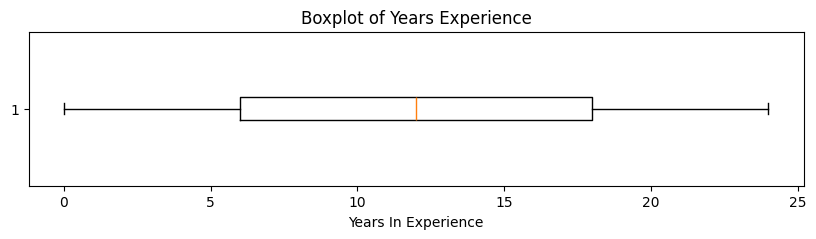

In [57]:
plt.figure(figsize=(10,2))
plt.boxplot(master_df['yearsExperience'], vert=False)
plt.xlabel('Years In Experience')
plt.title('Boxplot of Years Experience')
plt.show()

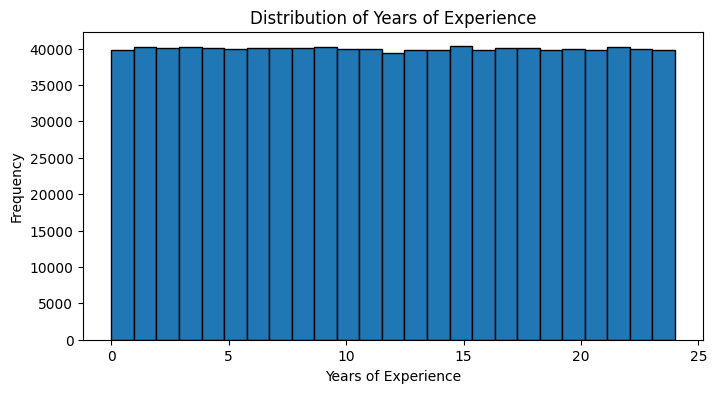

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(master_df['yearsExperience'], bins=25, edgecolor='k')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.show()

In [59]:
Q1 = master_df['yearsExperience'].quantile(0.25)
Q3 = master_df['yearsExperience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = master_df[(master_df['yearsExperience'] < lower_bound) | (master_df['yearsExperience'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers['yearsExperience'].value_counts())

Number of outliers: 0
Series([], Name: count, dtype: int64)


- No negative or missing values were found.
- The distribution of values (0–24 years) is plausible for the job market context.
- Zero years of experience is present for 39,822 records, likely representing new industry entrants, which is realistic.
- No cleaning required for this column.

##### `distanceFromCBD` Column Cleaning

In [60]:
print(master_df['distanceFromCBD'].describe())

count    999473.000000
mean         49.529449
std          28.883195
min           0.000000
25%          25.000000
50%          50.000000
75%          75.000000
max         500.000000
Name: distanceFromCBD, dtype: float64


In [61]:
print("Negative values:", (master_df['distanceFromCBD'] < 0).sum())

Negative values: 0


In [62]:
print("Missing values:", master_df['distanceFromCBD'].isnull().sum())

Missing values: 0


In [63]:
print("Top 10 values:", master_df['distanceFromCBD'].value_counts().head(10))

Top 10 values: distanceFromCBD
99.0    10171
62.0    10166
63.0    10150
97.0    10149
41.0    10145
92.0    10134
39.0    10128
85.0    10126
0.0     10116
81.0    10115
Name: count, dtype: int64


In [64]:
print(master_df['distanceFromCBD'].unique())

[ 83.  73.  30.  79.  29.  26.  81.   8.  91.  43.  66.  99.  96.  62.
  69.  63.  70.  40.   6.  23.   9.   2.  32.  78.  14.  58.  35.  17.
  54.  93.  82.  38.  87.  76.  22.  44.  72.  25.  36.   5.  71.  65.
  53.  13.  33.  55.  61.  98.  59.  15.  75.  56.  11.  12.  34.  21.
  52.  48.  97.  16.  28.  94.  41.  74.  60.  95.  80.  89.  10.  50.
   4.  68.  49.   3.  88.  47.  51.  31.  18.  92.  42.  39.  67.  84.
  86.  46.   0. 400.  19.  20.  57.  37.  64.   1.  27.  77.  90.  45.
  85.   7.  24. 500.]


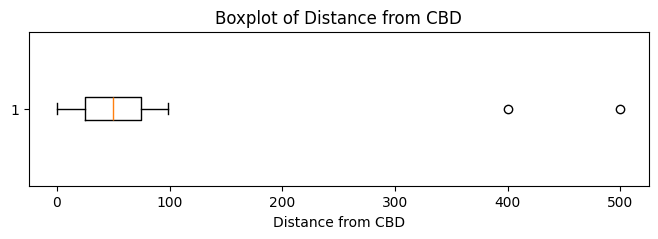

In [65]:
plt.figure(figsize=(8,2))
plt.boxplot(master_df['distanceFromCBD'], vert=False)
plt.xlabel('Distance from CBD')
plt.title('Boxplot of Distance from CBD')
plt.show()

In [66]:
max_distance = 60 # include people coming in from Johor Bahru
num_over = (master_df['distanceFromCBD'] > max_distance).sum()

print(f"Rows over {max_distance} km: {num_over}")

Rows over 60 km: 390233


In [67]:
percentage_of_60 = (num_over / len(master_df)) * 100

print(f"Percentage of entries which are more than 60 km are: {percentage_of_60:.2f}%")

Percentage of entries which are more than 60 km are: 39.04%


In [68]:
max_distance = 80 # include people coming in from Johor Bahru
num_over = (master_df['distanceFromCBD'] > max_distance).sum()

print(f"Rows over {max_distance} km: {num_over}")

Rows over 80 km: 190358


In [69]:
percentage_of_60 = (num_over / len(master_df)) * 100

print(f"Percentage of entries which are more than 60 km are: {percentage_of_60:.2f}%")

Percentage of entries which are more than 60 km are: 19.05%


Initially, the location of the dataset I have presumed was to be Singapore. And as a result, I presumed that any distance which is more than 60km will be unrealistic to be travelled on a daily basis. 

However, upon further analysis on the values of the `distanceFromCBD` column, there is a large chunk, which is north of 40% of people who travel more than 60km. 

The location is an assumption, and the general code, or the general practice of assumption is to not force it on the dataset, unless it constitutes lesser than 10% of the dataset. 

In this case, my assumption constitutes more than 10%(39.04%), which defies the traditional practices in data cleaning. 

When i try to increase the threshold by another 20 km, it is still 19%, which is more than 10%, and further increasing of the threshold will result in the remaining two values, which is 400 & 500, and those two can be easily removed. 

Therefore, while the code for the removal of the outliers is present below under the "Abandoned Section", I wil not proceed with any capping or threshold and only remove the two outliers below: 

In [70]:
# removing the two outliers

Q1 = master_df["distanceFromCBD"].quantile(0.25)
Q3 = master_df["distanceFromCBD"].quantile(0.75)
IQR = Q3 - Q1

# Only keep values within whisker bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

master_df = master_df[(master_df["distanceFromCBD"] >= lower_bound) &
                      (master_df["distanceFromCBD"] <= upper_bound)]


In [71]:
master_df["distanceFromCBD"].unique()

array([83., 73., 30., 79., 29., 26., 81.,  8., 91., 43., 66., 99., 96.,
       62., 69., 63., 70., 40.,  6., 23.,  9.,  2., 32., 78., 14., 58.,
       35., 17., 54., 93., 82., 38., 87., 76., 22., 44., 72., 25., 36.,
        5., 71., 65., 53., 13., 33., 55., 61., 98., 59., 15., 75., 56.,
       11., 12., 34., 21., 52., 48., 97., 16., 28., 94., 41., 74., 60.,
       95., 80., 89., 10., 50.,  4., 68., 49.,  3., 88., 47., 51., 31.,
       18., 92., 42., 39., 67., 84., 86., 46.,  0., 19., 20., 57., 37.,
       64.,  1., 27., 77., 90., 45., 85.,  7., 24.])

In [72]:
# print the value of each distance 


distance_counts = master_df['distanceFromCBD'].value_counts()

pd.DataFrame(distance_counts)

,count
distanceFromCBD,
99.0,10171
62.0,10166
63.0,10150
97.0,10149
41.0,10145
...,...
26.0,9836
6.0,9834
18.0,9817


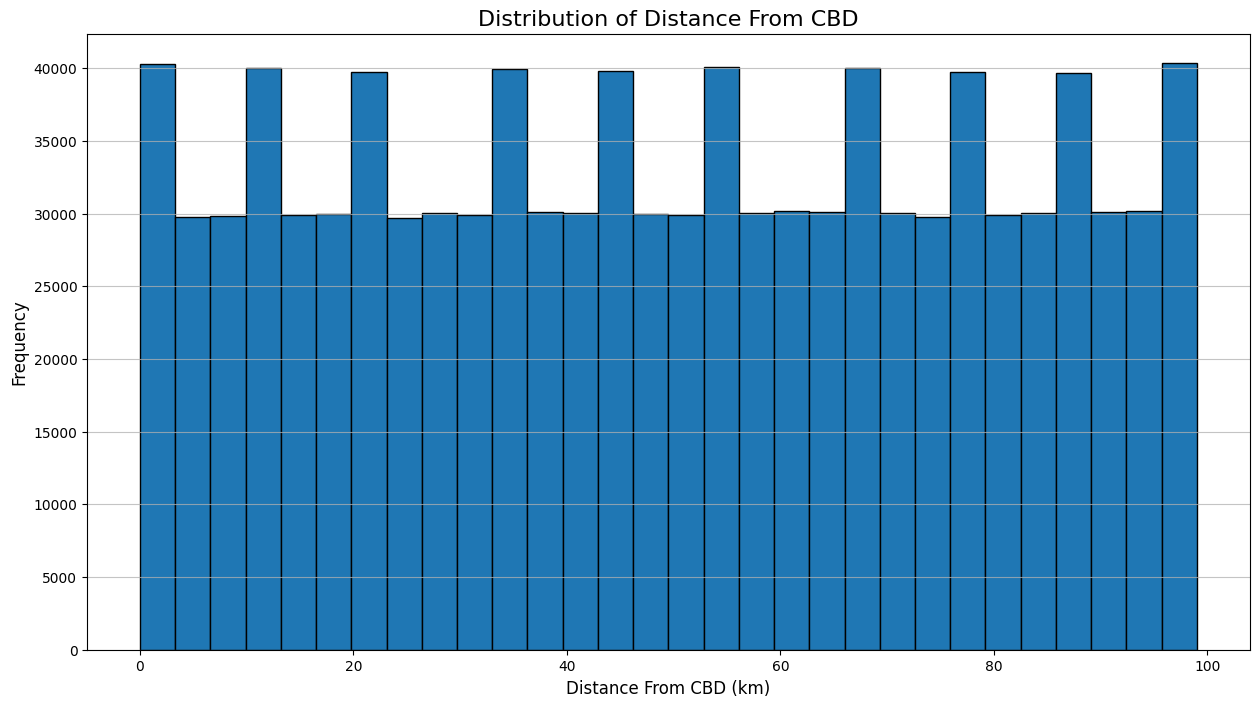

In [73]:
plt.figure(figsize=(15, 8))
plt.hist(master_df['distanceFromCBD'], bins=30, edgecolor='black')
plt.title('Distribution of Distance From CBD', fontsize=16)
plt.xlabel('Distance From CBD (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)


##### Abandoned Code (Capping to 60km):

In [74]:
# # cap values to 60 km
# master_df['distanceFromCBD'] = master_df['distanceFromCBD'].clip(upper=max_distance)

In [75]:
# master_df['distanceFromCBD'].unique()

##### `salaryInThousands` Columnn Cleaning:

In [76]:
print(master_df['salaryInThousands'].describe())

count    9.994710e+05
mean     1.260674e+02
std      1.000260e+04
min      0.000000e+00
25%      8.800000e+01
50%      1.140000e+02
75%      1.410000e+02
max      1.000000e+07
Name: salaryInThousands, dtype: float64


In [77]:
print("Negative values:", (master_df['salaryInThousands'] < 0).sum())

Negative values: 0


In [78]:
print("Zero salaries:", (master_df['salaryInThousands'] == 0).sum())

Zero salaries: 5


In [79]:
print("Missing values:", master_df['salaryInThousands'].isnull().sum())
print("\n")
print("Top 10 values:", master_df['salaryInThousands'].value_counts().head(10))

Missing values: 0


Top 10 values: salaryInThousands
108.0    10466
114.0    10403
107.0    10368
112.0    10355
104.0    10286
103.0    10282
110.0    10261
109.0    10241
115.0    10222
105.0    10213
Name: count, dtype: int64


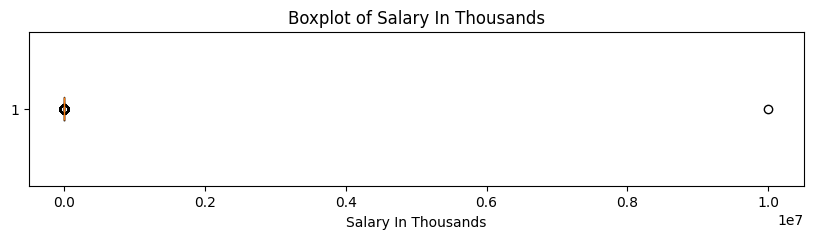

In [80]:
plt.figure(figsize=(10,2))
plt.boxplot(master_df['salaryInThousands'], vert=False)
plt.xlabel('Salary In Thousands')
plt.title('Boxplot of Salary In Thousands')
plt.show()

Check for the zero salaries and the high salary provided

In [81]:
# View rows with salary of exactly 10,000,000
million_salary = master_df[master_df['salaryInThousands'] == 1e7]
million_salary

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
903154,JOB1362685311220,COMP34,vice_president,high_school,none,oil,11.0,76.0,10000000.0


In [82]:
# View rows with salary of 0
zero_salary = master_df[master_df['salaryInThousands'] == 0]
zero_salary

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
30535,JOB1362684438246,COMP44,junior,doctoral,math,auto,11.0,7.0,0.0
495823,JOB1362684903671,COMP34,junior,none,none,oil,1.0,25.0,0.0
651906,JOB1362685059763,COMP25,cto,high_school,none,auto,6.0,60.0,0.0
815959,JOB1362685223816,COMP42,manager,doctoral,engineering,finance,18.0,6.0,0.0
827986,JOB1362685235843,COMP40,vice_president,masters,engineering,web,3.0,29.0,0.0


We inspected records with salaries of 0 and 10,000,000. The single extremely high value was judged to be an error and removed. The five entries with zero salary were likely unpaid internships or similar roles; these were also removed to maintain consistency in the analysis. 

We can remove these rows as they amount to around 6 rows, which does not impact the analaysis or the model training so much 


In [83]:
# Remove extreme high salaries
master_df = master_df[master_df['salaryInThousands'] <= 1000]

# Remove zero salary rows (if not analyzing unpaid roles)
master_df = master_df[master_df['salaryInThousands'] > 0]

In [84]:
master_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,83.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,none,web,3.0,73.0,101.0
2,JOB1362684407697,COMP56,janitor,high_school,none,health,24.0,30.0,102.0
3,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,79.0,144.0
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999468,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,94.0,88.0
999469,JOB1362685407683,COMP24,cto,high_school,none,finance,12.0,35.0,160.0
999470,JOB1362685407684,COMP23,junior,high_school,none,education,16.0,81.0,64.0
999471,JOB1362685407685,COMP3,cfo,masters,none,health,6.0,5.0,149.0


In [85]:
master_df["salaryInThousands"].unique()

array([130., 101., 102., 144.,  79., 193.,  47., 172., 126., 122.,  95.,
        32.,  68., 105.,  76., 202., 131., 158.,  82., 159., 132., 165.,
       100., 164., 115., 206., 183., 114., 104., 141., 119.,  91., 106.,
       112., 116., 148., 173., 113.,  70.,  88.,  96., 118., 140., 161.,
       111.,  55., 217.,  62.,  86.,  80., 168., 133., 129.,  89., 135.,
        94., 169.,  90., 110., 179., 176.,  84., 162., 107., 125., 205.,
        72.,  99., 145., 170., 180., 117., 207., 151., 108., 121., 166.,
        49.,  75., 194.,  52., 154., 146., 171., 139., 174.,  57., 127.,
        78., 152., 155.,  65., 123.,  48.,  42.,  50., 156., 178., 128.,
        83.,  69.,  85.,  59., 136.,  93.,  67., 134.,  97., 160., 195.,
       163.,  63., 153.,  74.,  73., 120., 187.,  92., 223.,  51.,  77.,
       103., 150.,  45., 137., 143.,  34., 124., 109., 190.,  98.,  58.,
       149., 157., 147.,  71.,  64., 167.,  46., 184.,  33.,  87., 188.,
        60.,  23., 177.,  61., 196., 175.,  54.,  3

### Overview Summary of the Cleaned `master_df.csv`

In [86]:
# print unique summary for master dataset
executive_summary = pd.DataFrame({
    "column": master_df.columns,
    "num_unique": [master_df[c].nunique(dropna=False) for c in master_df.columns],
    "example_values": [master_df[c].unique()[:10] for c in master_df.columns]  # Show first 10 unique values
})
executive_summary

,column,num_unique,example_values
0,jobId,999465,"[JOB1362684407687, JOB1362684407688, JOB136268..."
1,companyId,63,"[COMP37, COMP19, COMP56, COMP7, COMP4, COMP54,..."
2,jobRole,8,"[cfo, ceo, janitor, junior, cto, vice_presiden..."
3,education,5,"[masters, high_school, none, bachelors, doctoral]"
4,major,9,"[math, none, physics, biology, literature, che..."
5,industry,7,"[health, web, education, oil, finance, auto, s..."
6,yearsExperience,25,"[10.0, 3.0, 24.0, 7.0, 8.0, 21.0, 13.0, 1.0, 2..."
7,distanceFromCBD,100,"[83.0, 73.0, 30.0, 79.0, 29.0, 26.0, 81.0, 8.0..."
8,salaryInThousands,279,"[130.0, 101.0, 102.0, 144.0, 79.0, 193.0, 47.0..."


In [87]:
# Show general info about the cleaned DataFrame
master_df.info()

# Show summary statistics for numeric columns
master_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 999465 entries, 0 to 999472
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   jobId              999465 non-null  object 
 1   companyId          999465 non-null  object 
 2   jobRole            999465 non-null  object 
 3   education          999465 non-null  object 
 4   major              999465 non-null  object 
 5   industry           999465 non-null  object 
 6   yearsExperience    999465 non-null  float64
 7   distanceFromCBD    999465 non-null  float64
 8   salaryInThousands  999465 non-null  float64
dtypes: float64(3), object(6)
memory usage: 76.3+ MB


,yearsExperience,distanceFromCBD,salaryInThousands
count,999465.000000,999465.000000,999465.000000
mean,11.992393,49.528742,116.062783
std,7.212433,28.877572,38.717680
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [88]:
# Categorical columns to summarize
cat_cols = ['jobRole', 'education', 'major', 'industry']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(master_df[col].value_counts())


Value counts for jobRole:
jobRole
senior            125830
vice_president    125166
manager           125061
cto               124985
janitor           124907
ceo               124703
junior            124517
cfo               124296
Name: count, dtype: int64

Value counts for education:
education
high_school    236860
none           236713
bachelors      175405
doctoral       175268
masters        175219
Name: count, dtype: int64

Value counts for major:
major
none           532056
chemistry       58841
literature      58644
engineering     58566
business        58498
physics         58381
compsci         58352
biology         58351
math            57776
Name: count, dtype: int64

Value counts for industry:
industry
web          143140
auto         142876
finance      142796
education    142736
oil          142687
health       142673
service      142557
Name: count, dtype: int64


In [89]:
# Double-check for any missing data
print("\nMissing values by column:")
print(master_df.isnull().sum())
print("\n")
print("Duplicated Values in Master Dataset: ", master_df.duplicated().sum())


Missing values by column:
jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
dtype: int64


Duplicated Values in Master Dataset:  0


**After all cleaning steps, we checked the resulting DataFrame to confirm data integrity:**

- No missing values remain
- Categorical columns are standardized and have reasonable distributions
- Numeric columns contain only plausible, in-domain values

Above are the final data info, summary statistics, and category distributions.

In [90]:
# save the cleaned master_df to a CSV file
master_df_path = os.path.join(os.getcwd(), "master_df.csv")
master_df.to_csv(master_df_path, index=False)

print(f"Cleaned Master Dataset saved to: {master_df_path}")

Cleaned Master Dataset saved to: /Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment/master_df.csv


## Exploratory Data Analysis II : Data Visualisation

In [91]:
master_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,83.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,none,web,3.0,73.0,101.0
2,JOB1362684407697,COMP56,janitor,high_school,none,health,24.0,30.0,102.0
3,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,79.0,144.0
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999468,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,94.0,88.0
999469,JOB1362685407683,COMP24,cto,high_school,none,finance,12.0,35.0,160.0
999470,JOB1362685407684,COMP23,junior,high_school,none,education,16.0,81.0,64.0
999471,JOB1362685407685,COMP3,cfo,masters,none,health,6.0,5.0,149.0


### 1) Highest paying job for the web industry

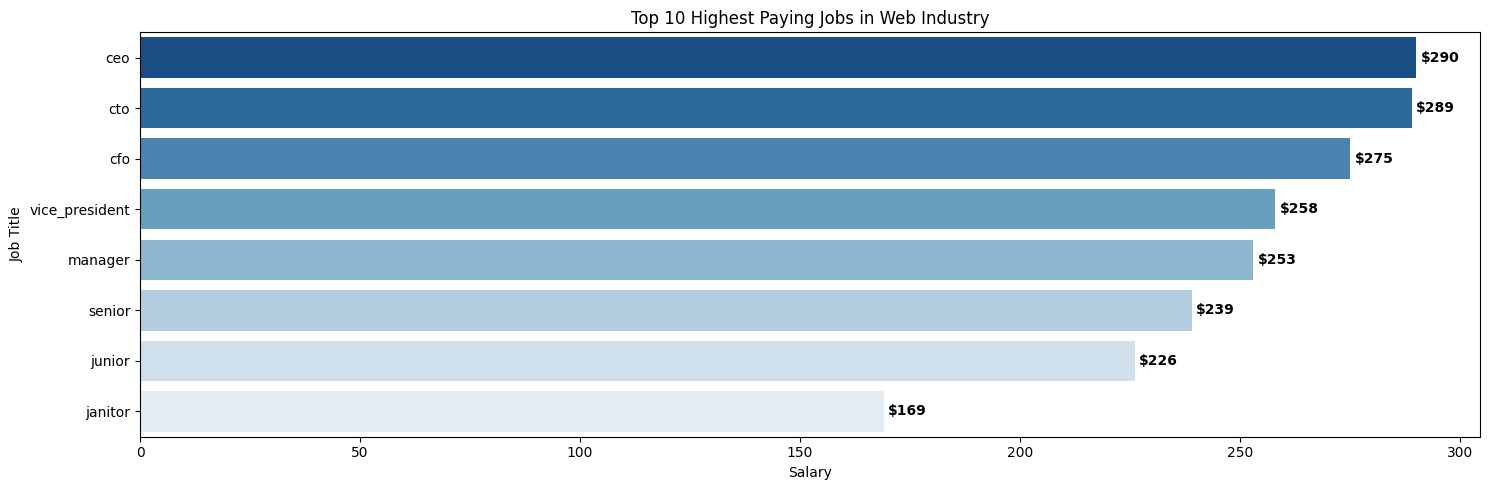

In [ ]:
# Get top 10 web jobs by salary
web_jobs = master_df[master_df['industry'].str.contains("Web", case=False)]

top_web_jobs = web_jobs.groupby("jobRole")["salaryInThousands"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(x=top_web_jobs.values, y=top_web_jobs.index, palette="Blues_r")
plt.title("Top 10 Highest Paying Jobs in Web Industry")
plt.xlabel("Salary")
plt.ylabel("Job Title")

# Add number labels
for i, v in enumerate(top_web_jobs.values):
    plt.text(v + 1, i, f"${v:,.0f}", va='center', fontweight='bold')

plt.tight_layout()

plt.show()


**C-suite domination**: CEO ($290k), CTO ($289k), CFO ($275k), followed by VP ($258k), Manager ($253k), Senior ($239k), Junior ($226k). There’s also a “janitor” bar ($169k), which is unusually high for that role—either a data label issue or a small, anomalous subset.

Insights
-	Role seniority > almost everything else within web: compensation climbs steeply as you move from junior → senior → manager → VP → C-suite.
-	The gap from junior to senior is meaningful (~$13k) and continues to widen as you move into management.
-	If “janitor” is truly in the dataset, it’s likely misclassified or represents a tiny sample (e.g., specialist facilities roles at FAANG-scale campuses with night differentials). Worth sanity-checking.

Real-world tie-in: In large consumer-web companies (e.g., Meta, Google), equity lifts senior/manager pay substantially; CTO/VP comp often reflects scarce leadership + strategic impact on product direction and platform bets.

### 2) Top 10 Jobs with the highest salary for all the industry

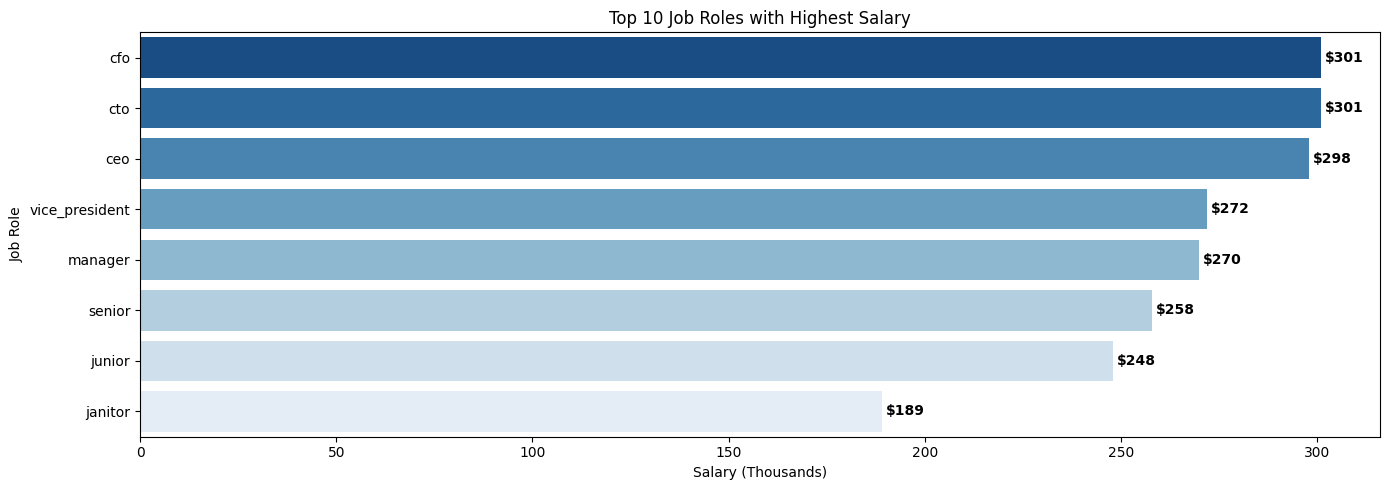

In [ ]:
top10_jobs = master_df.groupby("jobRole")["salaryInThousands"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,5))
ax = sns.barplot(x=top10_jobs.values, y=top10_jobs.index, palette="Blues_r")
plt.title("Top 10 Job Roles with Highest Salary")
plt.xlabel("Salary (Thousands)")
plt.ylabel("Job Role")


for i, v in enumerate(top10_jobs.values):
    plt.text(v + 1, i, f"${v:,.0f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

What it shows: Across all industries, CFO and CTO top out (~$301k), edging CEO ($298k), then VP ($272k), Manager ($270k), Senior ($258k), Junior ($248k), Janitor ($189k).

Insights
-	CFO/CTO ≳ CEO (on base/annualized figures) can happen when CEOs take lower base and more equity/bonus. CFO comp spikes in regulated/capital-intensive sectors; CTO comp spikes where deep tech or platform modernization are existential.
-	Manager > VP here by a hair could be sample noise or an industry mix effect (e.g., high-pay “manager” titles in finance/tech vs lower-pay “VP” titles in other sectors).

Real-world tie-in: In oil & gas or finance, CFOs carry outsized fiduciary risk; in AI-heavy firms, CTO premium reflects talent scarcity in ML/infra leadership.

### 3) Industries with the Highest Salary:

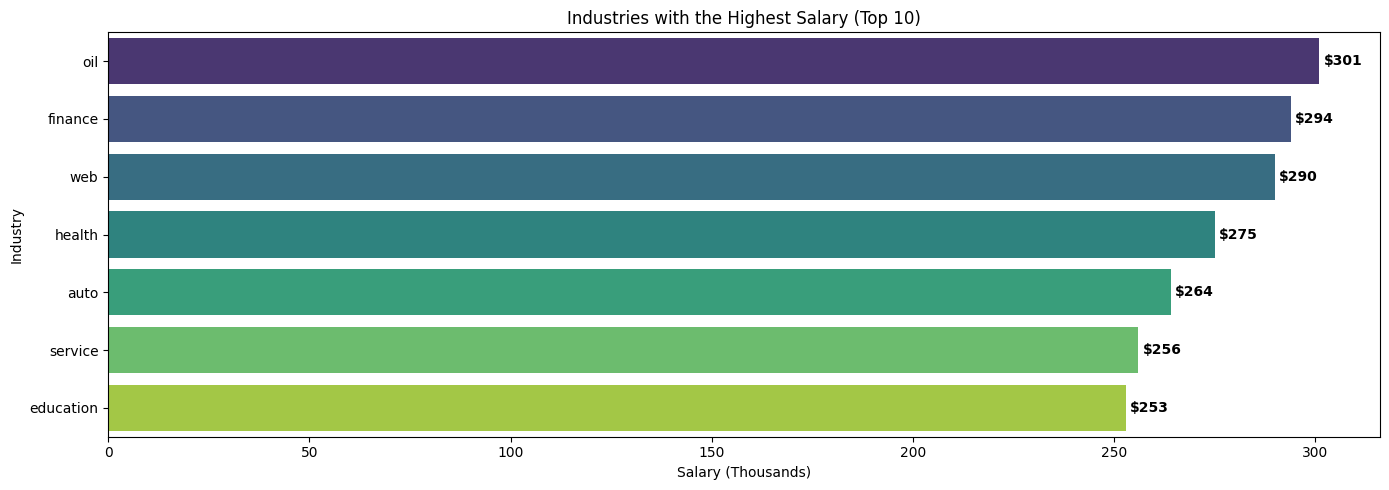

In [94]:
industry_highest_salary = master_df.groupby("industry")["salaryInThousands"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,5))
ax = sns.barplot(x=industry_highest_salary.values, y=industry_highest_salary.index, palette="viridis")
plt.title("Industries with the Highest Salary (Top 10)")
plt.xlabel("Salary (Thousands)")
plt.ylabel("Industry")

for i, v in enumerate(industry_highest_salary.values):
    plt.text(v + 1, i, f"${v:,.0f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


What it shows: Oil (~$301k) leads, then Finance (~$294k), Web (~$290k), Health (~$275k), Auto (~$264k), Service (~$256k), Education (~$253k).

Insights
-	Capital intensity + risk premium explain oil’s lead (field premiums, rotational hardship, volatile commodity cycles).
-	Finance + Web are close peers at the top—consistent with bonus/equity cultures, revenue scalability, and winner-takes-most dynamics.
-	Healthcare is high (specialists, pharma, med-tech); Auto sits mid-high due to advanced manufacturing + software (ADAS/EV).
-	Service/Education trail, but still look relatively high versus general expectations—which suggests your sample may skew to senior/urban segments or include administrative/clinical leadership for education/health.

Real-world tie-in: A software engineer moving from education tech to trading tech can see a step change simply from industry rent (not just skill).

### 4) Jobs with the Lowest Pay

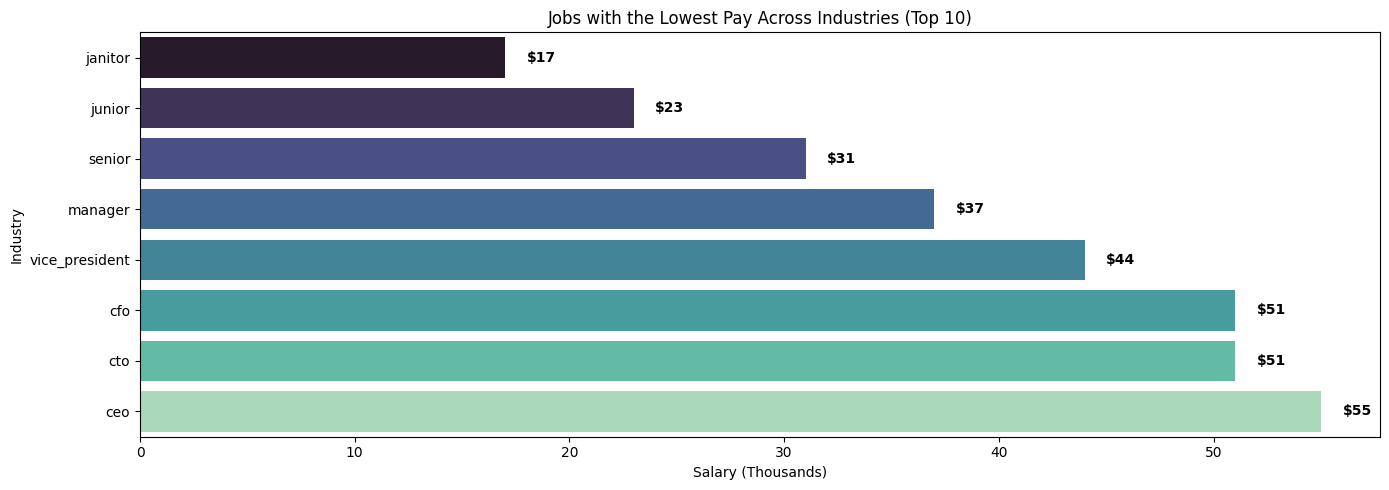

In [95]:
industry_lowest_salary = master_df.groupby("jobRole")["salaryInThousands"].min().sort_values().head(10)

plt.figure(figsize=(14,5))
ax = sns.barplot(x=industry_lowest_salary.values, y=industry_lowest_salary.index, palette="mako")
plt.title("Jobs with the Lowest Pay Across Industries (Top 10)")
plt.xlabel("Salary (Thousands)")
plt.ylabel("Industry")

for i, v in enumerate(industry_lowest_salary.values):
    plt.text(v + 1, i, f"${v:,.0f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


What it shows: Bars are job titles (janitor, junior, senior…CEO) with values ~$17k–$55k—not industries.
Likely interpretation: These look like role-level minimums or lower quantiles rather than industry lows.

Insights
-	Even for C-suite roles there exists a long lower tail (e.g., small nonprofits, early startups) with low base comp.
-	The presence of very low values for typically well-paid roles implies a wide pay dispersion; titles don’t guarantee pay without industry, company stage, geography, or equity context.

Action: Fix the axis/title to avoid confusion; if these are minima, label as “Lowest observed pay by role” and annotate sample sizes.

### 5) Industries with the Lowest Pay

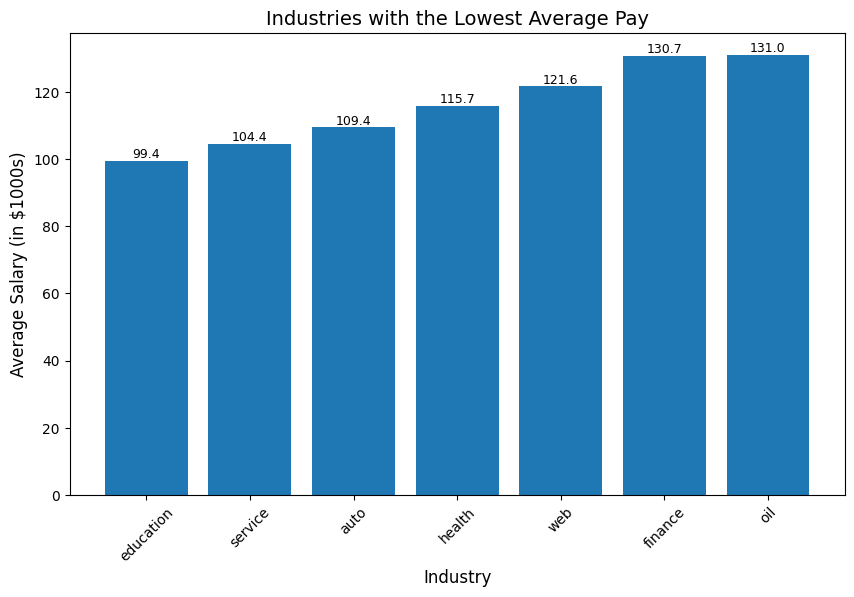

In [1]:
import matplotlib.pyplot as plt

import pandas as pd 

master_df = pd.read_csv("/Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment/master_df.csv")
# Group by industry to get average salary (lowest pay)
industry_salary = master_df.groupby("industry")["salaryInThousands"].mean().sort_values()

# Plot industries with lowest pay
plt.figure(figsize=(10,6))
bars = plt.bar(industry_salary.index, industry_salary.values)

# Add numbers on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

plt.title("Industries with the Lowest Average Pay", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average Salary (in $1000s)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

- **Education (~$99k)** is the lowest-paying industry, significantly below all others.  
- **Service (~$104k)** and **Auto (~$109k)** follow closely as other low-paying industries.  
- **Health (~$116k)** and **Web (~$122k)** sit in the middle, offering better pay but still below the top.  
- **Finance (~$131k)** and **Oil (~$131k)** are the highest-paying industries, about 32% higher than Education.

*Insights*
- The gap between Education and Finance/Oil highlights a **structural imbalance**: socially critical industries are systematically underpaid compared to profit-driven sectors.  
- **Talent attraction risk**: High-paying industries (Oil, Finance, Web) draw top talent, while Education and Service risk shortages.  
- **Sustainability concern**: Persistent underpayment in Education/Service threatens the supply of skilled workers in essential areas.  
- **Policy implication**: Government may need to raise compensation floors in low-pay but critical industries, while supporting upskilling/reskilling into higher-paying sectors.


The job market is **polarised**: socially essential sectors (Education, Service) remain underpaid, while Finance, Oil, and Web dominate compensation. Sector choice has a major impact on earnings potential, sometimes more than role or education level.

### 6a) Industries with Highest % of people below Median Salary

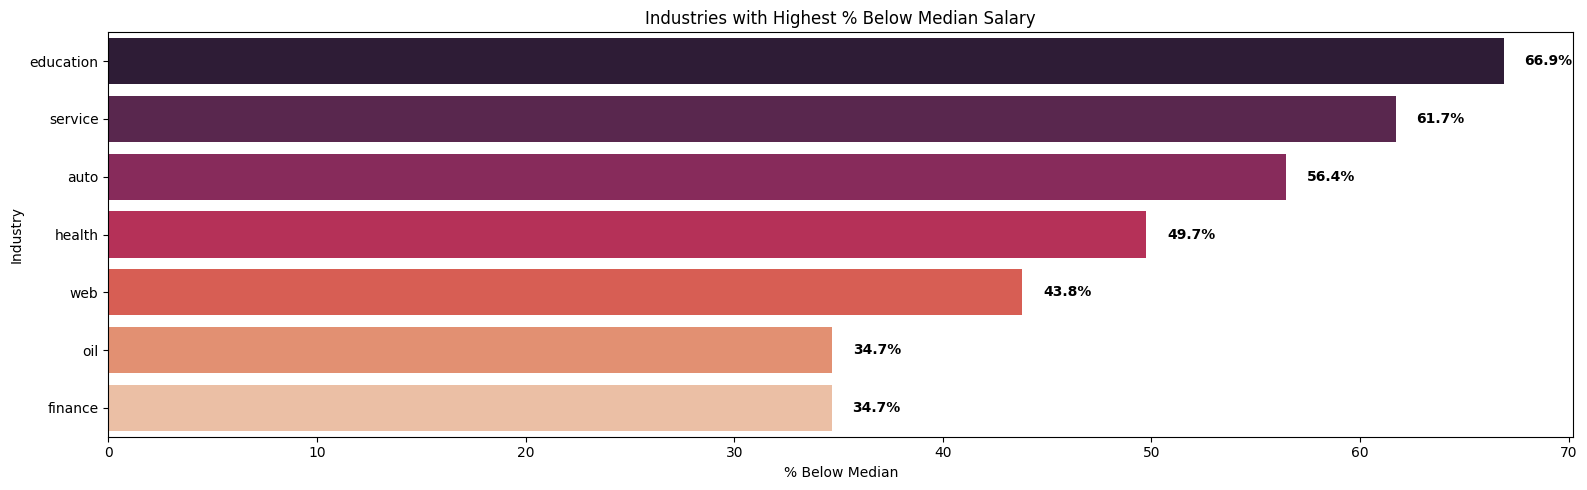

In [96]:
median_salary = 114

industry_below_median = master_df[master_df["salaryInThousands"] < median_salary].groupby("industry")["salaryInThousands"].count() / master_df.groupby("industry")["salaryInThousands"].count() * 100

industry_below_median = industry_below_median.sort_values(ascending=False).head(10)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=industry_below_median.values, y=industry_below_median.index, palette="rocket")
plt.title("Industries with Highest % Below Median Salary")
plt.xlabel("% Below Median")
plt.ylabel("Industry")

for i, v in enumerate(industry_below_median.values):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


What it shows: % below median is highest in Education (~66.9%), then Service (~61.7%), Auto (~56.4%), Health (~49.7%), Web (~43.8%), Oil (~34.7%), Finance (~34.7%).

Insights
-	Lower-pay sectors push most workers below $114k—particularly Education and Service.
-	Oil/Finance have fewer below-median workers (one-third) → compensation in these sectors is right-shifted (higher overall), not just top-heavy.
-	Web is mixed: still ~44% below median, indicating bimodality (many below, many far above due to equity/bonus).

Real-world tie-in: Universities (education) have large bases of roles (lecturers, staff) with compressed pay bands, while trading desks (finance) and offshore roles (oil) have high floors and high ceilings.

### 5b) Job Roles below median salary

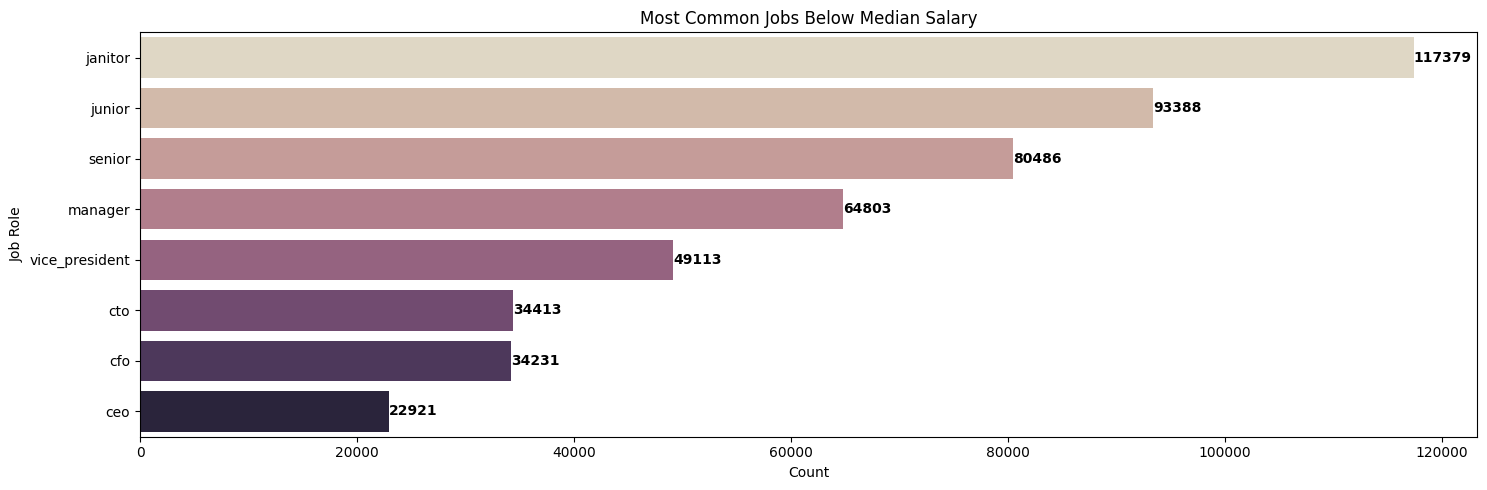

In [97]:
jobs_below_median = master_df[master_df["salaryInThousands"] < median_salary]["jobRole"].value_counts().head(10)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=jobs_below_median.values, y=jobs_below_median.index, palette="ch:s=-.2,r=.6")
plt.title("Most Common Jobs Below Median Salary")
plt.xlabel("Count")
plt.ylabel("Job Role")

for i, v in enumerate(jobs_below_median.values):
    plt.text(v + 0.2, i, f"{v}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


What it shows: Below $114k, counts skew to Janitor (~117k), Junior (~93k), Senior (~80k), Manager (~65k), then VP/CTO/CFO/CEO (still non-trivial).

Insights
-	Early-career roles dominate sub-median, as expected.
-	But a surprising number of “Senior” and “Manager” roles fall below $114k → possible title inflation or location effect (e.g., seniors in lower-cost regions or smaller firms).
-	Leadership titles below median likely reflect small-org realities where titles outpace pay, or where equity substitutes for salary.

Real-world tie-in: A “Senior Developer” at a 30-person startup in a Tier-2 city may earn less than a “Software Engineer I” at a FAANG in SF.

### 6) Relationship between Years of Experience & Salary

In [98]:
print(master_df.columns)

Index(['jobId', 'companyId', 'jobRole', 'education', 'major', 'industry',
       'yearsExperience', 'distanceFromCBD', 'salaryInThousands'],
      dtype='object')


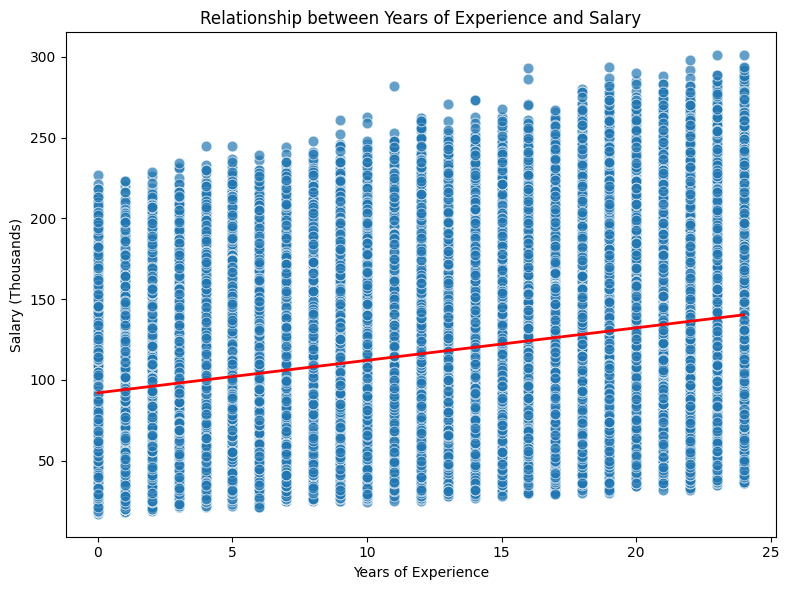

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="yearsExperience", y="salaryInThousands", data=master_df, s=60, alpha=0.7)
sns.regplot(x="yearsExperience", y="salaryInThousands", data=master_df, scatter=False, color="red", line_kws={"linewidth":2})
plt.title("Relationship between Years of Experience and Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (Thousands)")

plt.tight_layout()
plt.show()


What it shows: Clear positive slope, but wide dispersion at every experience level.

Insights
-	Experience helps, but it’s not destiny. The R² is likely modest: industry, role, company size, and equity drives a lot of variance.
-	You can see early high earners (outliers) at low experience—typical of quant trading, hot startups, or exceptional performers.
-	Plateauing is hinted at in the upper range: beyond ~15–20 years, increases are smaller unless you transition into leadership or revenue-critical roles.

Real-world tie-in: A 6-year engineer at a unicorn with pre-IPO equity may out-earn a 15-year engineer in a slow-growth enterprise.

### Relationship Between Education & Salary

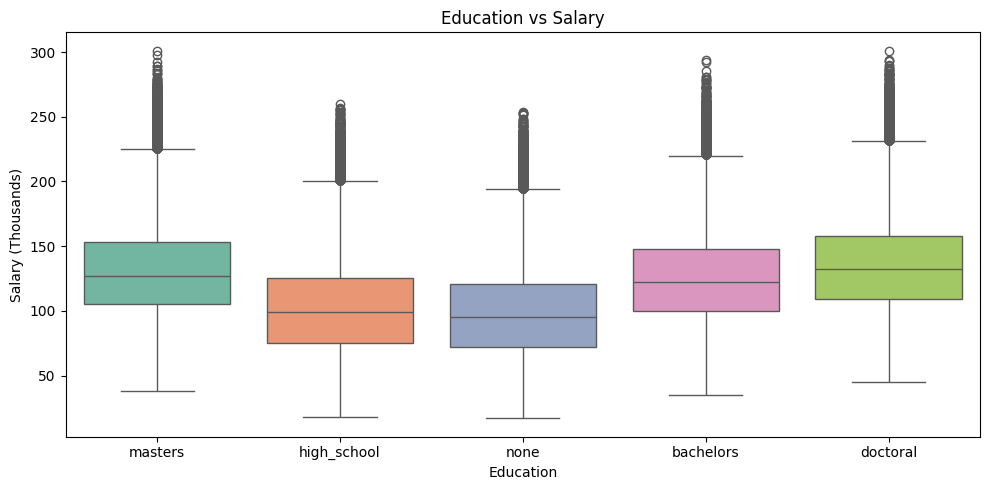

In [100]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="education", y="salaryInThousands", data=master_df, palette="Set2")
plt.title("Education vs Salary")
plt.xlabel("Education")
plt.ylabel("Salary (Thousands)")
plt.tight_layout()
plt.show()


What it shows: Doctoral has the highest median, then Masters/Bachelors (close), then High School/None. All groups show heavy upper tails (many outliers).

Insights
-	Higher education correlates with higher median pay, but the overlap is huge—plenty of bachelors/master’s out-earn doctorate holders.
-	The many “outliers” are expected with large n: boxplots flag values >1.5×IQR as points; salaries are right-skewed, so you’ll see lots of points above whiskers.
-	Degrees matter most when they unlock industries/roles (e.g., PhD → ML research), but industry/role still dominate the pay outcome.

Real-world tie-in: A non-degree SWE in FAANG with strong portfolio can out-earn a PhD in academia; conversely, PhDs in quant research/biotech can far exceed master’s medians.

The outliers do not mean they are an error, they just fall outside of the median which is the IQR

### Major Vs Salary:

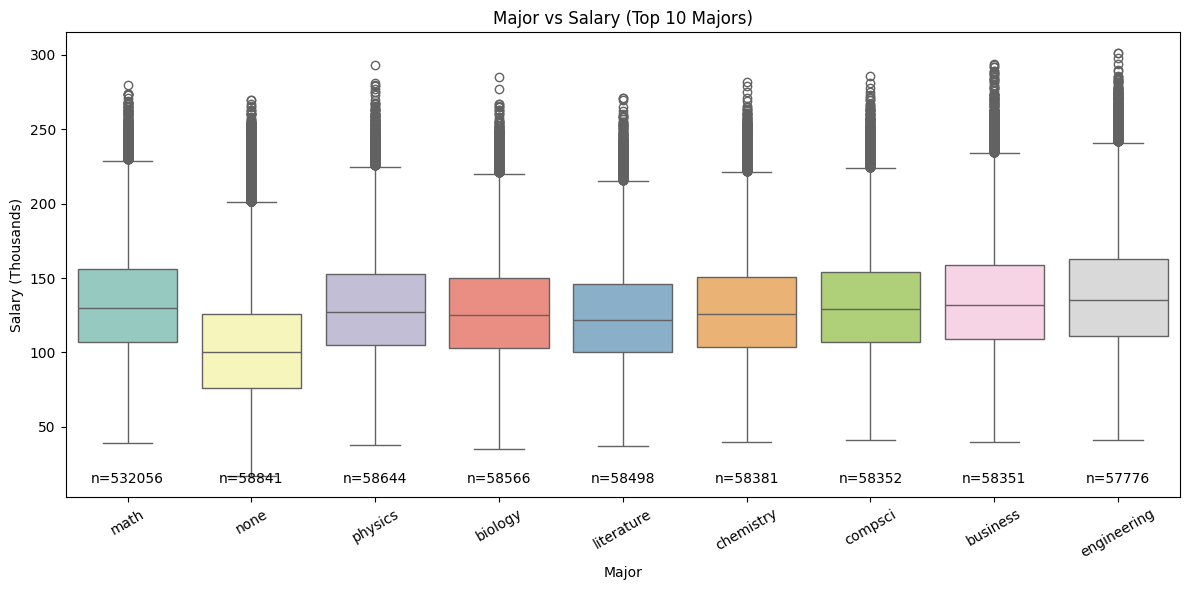

In [101]:
top_majors = master_df["major"].value_counts().head(10).index
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="major", y="salaryInThousands", data=master_df[master_df["major"].isin(top_majors)], palette="Set3")
plt.title("Major vs Salary (Top 10 Majors)")
plt.xlabel("Major")
plt.ylabel("Salary (Thousands)")
plt.xticks(rotation=30)

# Add data counts below each box
major_counts = master_df[master_df["major"].isin(top_majors)]["major"].value_counts()
for i, major in enumerate(top_majors):
    plt.text(i, master_df["salaryInThousands"].min() - 5, f"n={major_counts[major]}", ha='center', color='black')

plt.tight_layout()
plt.show()


What it shows: Technical/quant majors (Engineering, CompSci, Math, Physics) cluster at higher medians and broader upper tails; Humanities (Literature) and None trend lower. Business sits high too (finance/consulting tracks).

Insights
-	Field choice shifts the distribution you enter: technical/business majors funnel into high-pay industries with scalable compensation.
-	Again, overlap is substantial: standout performers in “lower-pay” majors can land in high-pay niches (e.g., PMs, growth, policy+AI safety).
-	Sample sizes (shown as “n=…”) matter—groups with huge n will naturally display many “outliers” even if the proportion is small.

Real-world tie-in: A Literature major who pivots to product growth at a top consumer app can out-earn many baseline engineers; but the default odds favor Eng/CS/Math for top-quartile pay.

### Final Analysis of the Job Market Survey

#### Key Findings & Implications

| Theme | Key Findings (from graphs & analysis) | Implications for Government |
|-------|---------------------------------------|-----------------------------|
| **Role Seniority & Industry Effects** | Salaries increase significantly with **seniority** (junior → senior → manager → VP → C-suite). High-paying sectors include **Oil (~$301k), Finance (~$294k), and Web (~$290k)**, while **Education (~$253k) and Service (~$256k)** lag behind. | - **Labour market is segmented**: high-wage growth sectors vs. socially critical but underpaid sectors.<br>- Without intervention, inequality between industries may widen, especially between **knowledge-intensive industries** and **public service-oriented ones**. |
| **Education & Majors** | Higher qualifications (Doctoral > Masters > Bachelors > High School) correlate with higher median pay, but with **wide overlaps**. Technical and business majors enjoy stronger earnings distributions than humanities. | - **Educational attainment matters but is not deterministic** — variance suggests that market structures, industry demand, and role type weigh heavily.<br>- **STEM/business education pathways** are strong contributors to national wage growth and competitiveness. |
| **Experience vs Salary** | Salary generally rises with **years of experience**, but there is **wide dispersion** at every level — industry and role explain more of the variation than experience alone. | - Experience contributes, but **sectoral mobility and skill alignment** are more important for wage outcomes.<br>- Policies that enable **mid-career transitions** (reskilling programs, industry mobility pathways) can reduce stagnation for experienced workers. |
| **Pay Distribution & Inequality** | Salaries are **right-skewed**: most workers earn near/below the median ($114k), while a minority capture extremely high earnings. Even prestigious roles (e.g., “Senior”, “Manager”) sometimes fall below median. | - **High inequality** exists within roles and industries.<br>- Wage volatility and reliance on **equity/bonus-heavy packages** (esp. in tech/finance) may distort perceptions of compensation fairness across industries. |
| **Below-Median Concentration by Sector** | Over **two-thirds of Education workers (~67%)** and **62% of Service workers** earn below the median salary. By contrast, only ~35% in Oil/Finance fall below median, showing **higher floors** in those industries. | - **Structural underpayment in Education/Service sectors** threatens long-term sustainability of these critical industries.<br>- Risk of **talent flight** from essential public-facing roles (teachers, healthcare, service) into private high-wage sectors unless pay competitiveness is addressed. |

---

#### Recommendations to the Government

1. **Address Sectoral Pay Gaps**  
   - Introduce **targeted wage support or incentives** for Education and Service sectors, where most workers fall below the national median.  
   - Recognize these sectors as **critical for social infrastructure** and align compensation policies to reflect their societal value.  

2. **Invest in Skills for Growth Industries**  
   - Expand **STEM, AI, Finance, and Digital Technology education pipelines** to supply talent for high-growth, high-wage industries.  
   - Support **lifelong learning programs** and **reskilling initiatives** to enable mobility from low-pay to high-pay sectors.  

3. **Support Mid-Career Mobility**  
   - Develop **career transition programs** for experienced workers stuck in stagnant pay sectors, enabling movement into industries with stronger wage growth.  
   - Incentivize partnerships between government, universities, and industry for **executive education** and **professional certifications**.  

4. **Enhance Pay Transparency & Equity Monitoring**  
   - Implement **labour market reporting systems** to track wage distributions, outliers, and equity-heavy compensation structures.  
   - Ensure transparency in pay to reduce inequities within roles (e.g., “Senior” or “Manager” titles with widely varying pay).  

5. **Data & Policy Alignment**  
   - Improve survey reporting clarity (e.g., correcting mislabeled charts, ensuring sample sizes/medians are visible).  
   - Use the survey insights to **inform workforce planning**, ensuring national labour strategy aligns with market realities.  

---

### Executive Takeaway

The survey reveals a **polarised job market**:

- **High-pay, growth sectors** (Oil, Finance, Web/AI) are capturing a disproportionate share of compensation.  
- **Essential public service sectors** (Education, Service) face **systemic underpayment**, with most workers earning below the national median.  
- **Policy action is required** to both (1) ensure competitiveness of socially critical sectors and (2) prepare the workforce with the right skills to thrive in high-growth industries.  

### Non-PySpark Modelling:

The Modelling for PySpark will be segregated into three different phases: 

1. Phase 1 - Baseline Modelling: Simple Column Transformer, no additional feature engineering whatsoever. 
2. Phase 2 - Log Transformation: Incorporate Log Transformation to prevent skewness on data, coupled with more aggressive Encoding and Scaling Techniques (RobustScalar/TargetEncoding)
3. Phase 3 - CV: Incorporate RandomSearchCV with KFolds in order to squeeze out better metrics. 

In [ ]:
TARGET = "salaryInThousands"

# # Categorical & numeric feature lists
cat_cols = ["jobRole", "education", "major", "industry", "companyId"]
num_cols = ["yearsExperience", "distanceFromCBD"]

# X = master_df[cat_cols + num_cols]
# y = master_df[TARGET]

# subsampling:
sample_df = master_df.sample(n=50_000, random_state=42)


X = sample_df[cat_cols + num_cols]
y = sample_df[TARGET]


In [103]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


In [104]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", "passthrough", num_cols),   # tree models don’t need scaling
    ]
)


#### RandomForest Regressor

In [105]:
random_forestv1_time = time.time()

In [106]:
rf_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("rf",  RandomForestRegressor(
                    n_estimators=300,
                    max_depth=None,
                    n_jobs=-1,
                    random_state=42,
                )
        ),
    ]
)
rf_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [107]:
random_forestv1_time_end = time.time()

total_v1_rf = random_forestv1_time_end - random_forestv1_time

print(f"Total time taken to train Random Forest (Non-PySpark): {total_v1_rf:.2f}s")

Total time taken to train Random Forest (Non-PySpark): 37.52s


In [108]:
def evaluate(name, model, X_val, y_val, X_test, y_test):
    for split, X_, y_ in [("VAL", X_val, y_val), ("TEST", X_test, y_test)]:
        preds = model.predict(X_)
        # rmse = mean_squared_error(y_, preds, squared=False)
        # mse  = mean_squared_error(y_, preds, squared=True)
        mse = np.mean((y_ - preds) ** 2)
        rmse = np.sqrt(mse)
        mae  = mean_absolute_error(y_, preds)
        r2   = r2_score(y_, preds)
        print(f"{name:<10} | {split} | RMSE: {rmse:8.2f} | MAE: {mae:8.2f} "
              f"| MSE: {mse:10.2f} | R²: {r2:6.3f}")

print("----- Random Forest Results -----")
evaluate("RandomRF", rf_model, X_val, y_val, X_test, y_test)

----- Random Forest Results -----
RandomRF   | VAL | RMSE:    20.11 | MAE:    16.04 | MSE:     404.25 | R²:  0.724
RandomRF   | TEST | RMSE:    20.47 | MAE:    16.35 | MSE:     419.11 | R²:  0.728


#### XGBoost:

In [109]:
xgb_v1_time_start = time.time()

In [110]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42,
)

In [111]:
xgb_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb",  xgb_reg),
    ]
)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=600, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [112]:
xgb_v1_time_end = time.time()

xgb_total_time_v1 = xgb_v1_time_end - xgb_v1_time_start

print(f"Total time taken to train XGBoost(Non-PySpark): {xgb_total_time_v1}")

Total time taken to train XGBoost(Non-PySpark): 0.9547531604766846


In [113]:
print("\n----- XGBoost Results -----")
evaluate("XGBoost ", xgb_model, X_val, y_val, X_test, y_test)


----- XGBoost Results -----
XGBoost    | VAL | RMSE:    19.10 | MAE:    15.42 | MSE:     364.98 | R²:  0.751
XGBoost    | TEST | RMSE:    19.32 | MAE:    15.60 | MSE:     373.25 | R²:  0.758


#### LinearRegression

In [114]:
lr_v1_time_start = time.time()

In [115]:
linear_model = Pipeline([
    ("prep", preprocess),  # OneHotEncoder + numeric passthrough
    ("lr", LinearRegression(n_jobs=-1))
])

# Train on train set
linear_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('lr', LinearRegression(n_jobs=-1))])

In [116]:
# Evaluate on val and test sets
print("----- Linear Regression Results -----")
evaluate("LinearReg", linear_model, X_val, y_val, X_test, y_test)

----- Linear Regression Results -----
LinearReg  | VAL | RMSE:    19.54 | MAE:    15.75 | MSE:     381.64 | R²:  0.739
LinearReg  | TEST | RMSE:    19.76 | MAE:    15.94 | MSE:     390.64 | R²:  0.747


In [117]:
lr_v1_time_end = time.time()

lr_v1_time_total = lr_v1_time_end - lr_v1_time_start

print(f"Total time taken to train LinearRegression(Non-PySpark): {lr_v1_time_total:.2f}")

Total time taken to train LinearRegression(Non-PySpark): 0.34


#### CatBoost Regressor:

In [118]:
catboost_start_time_v1 = time.time()

In [119]:
# --- CatBoost Model ---
catboost = CatBoostRegressor(
    depth=8,
    learning_rate=0.1,
    iterations=1000,
    loss_function="RMSE",
    eval_metric="RMSE",
    random_seed=42,
    cat_features=cat_cols,
    verbose=200  # shows training progress every 200 iters
)

# Fit
catboost.fit(X_train, y_train, use_best_model=True)

0:	learn: 36.1896320	total: 66.1ms	remaining: 1m 6s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


200:	learn: 18.1832523	total: 1.65s	remaining: 6.55s
400:	learn: 17.4296014	total: 3.23s	remaining: 4.82s
600:	learn: 16.7031552	total: 4.9s	remaining: 3.25s
800:	learn: 16.0535623	total: 6.86s	remaining: 1.7s
999:	learn: 15.4318277	total: 8.57s	remaining: 0us


In [120]:
evaluate("CatBoost", xgb_model, X_val, y_val, X_test, y_test)

catboost_end_time_v1 = time.time()

CatBoost   | VAL | RMSE:    19.10 | MAE:    15.42 | MSE:     364.98 | R²:  0.751
CatBoost   | TEST | RMSE:    19.32 | MAE:    15.60 | MSE:     373.25 | R²:  0.758


In [121]:
catboost_v1_total_time = catboost_end_time_v1 - catboost_start_time_v1
print(f"Time taken to train CatBoost (Non-PySpark): {catboost_v1_total_time}")

Time taken to train CatBoost (Non-PySpark): 8.852792024612427


#### Phase 2: Log Transformation With Advanced Encoding & Scaling


#### Log Transformations

##### What We Did
- Applied **log1p** (`log(1+x)`) to:
  - Numeric features (after clipping at 0 to avoid negative/NaN values).
  - Target variable.

This reduces skewness, stabilizes variance, and makes distributions closer to normal.
##### Benefits for Models

1. **Random Forest (RF)**
- RF splits on thresholds; highly skewed variables can create unbalanced or less informative splits.
- Log transform compresses large values and spreads smaller ones → **more balanced splits and better generalization**.

2. **XGBoost**
- Like RF, relies on thresholds for splits.
- Log-transformed features reduce dominance of extreme values, leading to **more stable boosting steps**.
- For the target, smoother error distribution improves optimization of the loss function.

3. **Ridge Regression**
- Linear models assume linearity and normally-distributed errors.
- Log-transforming features reduces skew and helps linearity.
- Log-transforming the target stabilizes variance, making errors **closer to Gaussian**, which improves Ridge’s fit.

4. **CatBoost**
- CatBoost also benefits from log-transformed numeric features → cleaner splits.
- Log-transforming the target reduces heteroscedasticity (unequal error variance).
- This helps CatBoost’s gradient-based optimization produce **faster convergence and better calibrated predictions**.

##### Why This Helps Across the Board
- **Handles skewness** → reduces impact of outliers.  
- **Stabilizes variance** → errors become more consistent.  
- **Improves model fit** → especially critical for linear models but beneficial for tree ensembles too.  

**In summary:**
- **Numeric features (log1p):** smooth distributions, balance splits, reduce dominance of extreme values.  
- **Target (log1p):** stabilizes variance and makes prediction errors more well-behaved.  
- ✅ Log transforms improve interpretability, training stability, and performance for **all models (RF, XGB, Ridge, CatBoost)**.
---

####  Ridge Regression

##### Ridge Regression Basics
- Ridge = **Linear Regression + L2 regularization** (penalizes large coefficients).
- Very **sensitive to feature scales** → scaling is essential.

**RobustScalar is good as it?**
- Scales features using **median** and **interquartile range (IQR)**.
- Less sensitive to **outliers** compared to StandardScaler.
- Ensures Ridge regression coefficients remain **stable and balanced**.

**Benefit:** Prevents a few extreme values from dominating the model.

**One-Hot Encoding is optimal**:
- Ridge expects **numeric, continuous features**.
- OHE converts categorical variables into **binary 0/1 columns**.
- Avoids introducing **false orderings** (e.g., `"red=1, blue=2, green=3"`).
- Lets Ridge regression treat categories **equally and fairly**.

**Benefit:** Prevents the linear model from assuming non-existent numeric relationships in categories.

##### Coupled together:
- **RobustScaler** → handles numeric features with outliers.
- **OHE** → properly encodes categorical features.
- Together → provide Ridge regression with a **clean, well-scaled, unbiased feature space**.

**In summary:**
- Use **RobustScaler** for robust numeric scaling (outlier-resistant)  
- Use **OHE** for categorical variables (fair representation)  
- ✅ This leads to a Ridge model that generalizes better and avoids misleading relationships.

---

#### Tree Based Models
- Models like **Random Forest** and **XGBoost** split data based on **thresholds** (e.g., `feature < value`).
- They do **not rely on distances or coefficients** like linear models do.
- This makes them naturally **invariant to feature scaling**.


##### Scaling:
- Scaling (StandardScaler, MinMaxScaler, RobustScaler, etc.) does **not affect decision boundaries** in tree models.
- Example: If a split happens at `feature < 10`, scaling the feature to `[0, 1]` would still split at the corresponding scaled threshold.
- Tree performance is therefore **unchanged by scaling**.

**Benefit:** Saves preprocessing effort — no need for scaling numeric features.

##### TargetEncoding?
- One-Hot Encoding (OHE) can create **very high-dimensional sparse data** if categorical variables have many unique categories.
- Tree-based models can struggle with such wide data (more splits, slower training).
- **Target Encoding** replaces each category with the **mean of the target variable** for that category.
  - Captures useful information about the relationship between categories and the target.
  - Keeps feature space **compact and informative**.
- Works especially well with boosting algorithms (XGBoost, CatBoost) that benefit from this additional signal.

**Benefit:** Encodes categorical variables efficiently without exploding dimensionality, while leveraging target–category relationships.

##### Combination:
- **No scaling needed** → tree-based splits are scale-invariant.
- **Target Encoding** → handles categorical variables more efficiently than OHE in high-cardinality cases.
- Together → allow Random Forest and XGBoost to focus on learning splits and interactions without being bogged down by unnecessary preprocessing.

**In summary:**
- Tree models → **ignore feature scaling** (threshold-based).  
- Use **Target Encoding** for categorical features (compact, informative).  
- This leads to more efficient training and often stronger predictive performance for tree-based methods.


---

#### CatBoost Basics
- **CatBoost** is a gradient boosting algorithm designed to **natively handle categorical features**.
- It uses **ordered target statistics** (a variant of target encoding) internally, which prevents overfitting.
- Unlike linear models, CatBoost (like other tree-based methods) is **invariant to feature scaling**.


##### Scaling in CatBoost
- **No scaling is required.**
- Tree-based algorithms split features by thresholds (e.g., `feature < value`).
- Whether features are `[1, 2, 3]` or `[0.1, 0.2, 0.3]`, the splits and results are the same.
  
**Benefit:** Saves preprocessing time and avoids unnecessary transformations.


##### Encoding in CatBoost
- **No manual One-Hot Encoding (OHE) or Target Encoding (TE)** is needed.
- You simply specify which columns are categorical (`cat_features`).
- CatBoost then applies its own **efficient encoding scheme**:
  - Replaces categories with statistics (like target-based encodings).
  - Uses permutations to avoid target leakage and overfitting.
  - Works well even with **high-cardinality categorical features**.

**Benefit:** Handles categorical features automatically, more efficiently than OHE or manual TE.


##### Combination
- **Scaling**: Not needed → CatBoost is tree-based.  
- **Encoding**: Built-in target statistics encoding → better than manual preprocessing.  
- Together → CatBoost simplifies the pipeline by **removing the need for external scaling or encoding steps**.

**In summary:**
- **No scaling needed** (tree splits are scale-invariant).  
- **No manual encoding needed** (CatBoost natively handles categorical features with its own method).  
- ✅ CatBoost is often the most “plug-and-play” option for datasets with mixed numerical and categorical features.


In [ ]:
import pandas as pd
import numpy as np
# target/mean encoders
import category_encoders as ce

RANDOM_STATE = 42
TARGET = "salaryInThousands"
SAMPLE_N = 50_000


df = pd.read_csv("master_df.csv")



# sample 50k rows (or all if fewer)
if len(df) > SAMPLE_N:
    df = df.sample(n=SAMPLE_N, random_state=RANDOM_STATE)

# =============== FEATURE SPLITS ===============
all_features = [c for c in df.columns if c != TARGET]
num_cols = df[all_features].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in all_features if c not in num_cols]


In [123]:
# =============== LOG TRANSFORMS ===============
# log1p on numeric features (helps non-linearity & skew)
df[num_cols] = df[num_cols].apply(lambda s: np.log1p(s.clip(lower=0)))
# log1p on target
df[TARGET] = np.log1p(df[TARGET].clip(lower=0))

# =============== SPLIT: train/val/test ===============
X = df[all_features].copy()
y = df[TARGET].copy()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE
)

# helper
# def evaluate(name, y_true, y_pred, split="Val"):
#     mse = mean_squared_error(y_true, y_pred)  # regular MSE
#     rmse = np.sqrt(mse)  # take square root manually
#     r2 = r2_score(y_true, y_pred)
#     print(f"{name} | {split} RMSE: {rmse:,.4f} | {split} R²: {r2:,.4f}")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate(name, y_true, y_pred, split="Val"):
    """
    Evaluates regression model performance and prints RMSE, MAE, and R².
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)  # Calculate MAE
    r2 = r2_score(y_true, y_pred)

    # Updated print statement to include MAE
    print(f"{name} | {split} RMSE: {rmse:,.4f} | {split} MAE: {mae:,.4f} | {split} R²: {r2:,.4f}")

In [ ]:
# =========================================================
#                    MODEL 1: LINEAR REGRESSION
# - RobustScaler on numeric
# - OneHot on categoricals (best for linear models)
# =========================================================
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import numpy as np


try:
    cat_proc_lr = OneHotEncoder(handle_unknown="ignore", sparse_output=True, dtype=np.float32)
except TypeError:
    cat_proc_lr = OneHotEncoder(handle_unknown="ignore", sparse=True, dtype=np.float32)

# Numeric stays dense inside its branch; ColumnTransformer will convert it to sparse on combine
num_proc_lr = Pipeline(steps=[
    ("scaler", RobustScaler(with_centering=True, with_scaling=True)),
])

pre_lr = ColumnTransformer(
    transformers=[
        ("num", num_proc_lr, num_cols),
        ("cat", cat_proc_lr, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=0.3,   
)

# Use Ridge (handles sparse efficiently). Alpha can be tuned.
lr_pipe = Pipeline(steps=[
    ("pre", pre_lr),
    ("model", Ridge(alpha=1.0, random_state=42)),
])

phase2_lr_start = time.time()

lr_pipe.fit(X_train, y_train)
phase2_lr_end = time.time()
y_val_pred_lr = lr_pipe.predict(X_val)
evaluate("LR(Ridge+SparseOHE)", y_val, y_val_pred_lr, "Val")

y_test_pred_lr = lr_pipe.predict(X_test)
evaluate("LR(Ridge+SparseOHE)", y_test, y_test_pred_lr, "Test")


LR(Ridge+SparseOHE) | Val RMSE: 0.1804 | Val MAE: 0.1475 | Val R²: 0.7397
LR(Ridge+SparseOHE) | Test RMSE: 0.1833 | Test MAE: 0.1501 | Test R²: 0.7443


In [125]:
total_lr_phase2 = phase2_lr_end - phase2_lr_start

print(f"Total time taken to train LinearRegression Phase 2: {total_lr_phase2}")

Total time taken to train LinearRegression Phase 2: 0.10032415390014648


In [126]:
# =========================================================
#          MODEL 2: RANDOM FOREST with TARGET ENCODING
# - TargetEncoder for categoricals (regularized)
# - No scaling (tree-based)
# =========================================================

# Fit target encoder ONLY on training data to avoid leakage
te_rf = ce.TargetEncoder(cols=cat_cols, smoothing=0.25, min_samples_leaf=50)
te_rf.fit(X_train[cat_cols], y_train)

X_train_rf = X_train.copy()
X_val_rf = X_val.copy()
X_test_rf = X_test.copy()

X_train_rf[cat_cols] = te_rf.transform(X_train[cat_cols])
X_val_rf[cat_cols] = te_rf.transform(X_val[cat_cols])
X_test_rf[cat_cols] = te_rf.transform(X_test[cat_cols])

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    n_jobs=-1,
    random_state=RANDOM_STATE,
)
rf_phase2_start = time.time()
rf.fit(X_train_rf, y_train)
rf_phase2_end = time.time()

y_val_pred_rf = rf.predict(X_val_rf)
evaluate("RF", y_val, y_val_pred_rf, "Val")

y_test_pred_rf = rf.predict(X_test_rf)
evaluate("RF", y_test, y_test_pred_rf, "Test")

RF | Val RMSE: 0.1615 | Val MAE: 0.1345 | Val R²: 0.7915
RF | Test RMSE: 0.1624 | Test MAE: 0.1360 | Test R²: 0.7992


In [127]:
total_phase2_rf = rf_phase2_end - rf_phase2_start

print(f"Total time taken for Random Forest to train Phase 2: {total_phase2_rf}")

Total time taken for Random Forest to train Phase 2: 1.411435842514038


In [128]:
from xgboost import XGBRegressor
# =========================================================
#             MODEL 3: XGBOOST with TARGET ENCODING
# - TargetEncoder for categoricals (same as RF)
# =========================================================
# reuse the same target encoder (fit on train only)
te_xgb = ce.TargetEncoder(cols=cat_cols, smoothing=0.25, min_samples_leaf=50)
te_xgb.fit(X_train[cat_cols], y_train)

X_train_xgb = X_train.copy()
X_val_xgb = X_val.copy()
X_test_xgb = X_test.copy()

X_train_xgb[cat_cols] = te_xgb.transform(X_train[cat_cols])
X_val_xgb[cat_cols] = te_xgb.transform(X_val[cat_cols])
X_test_xgb[cat_cols] = te_xgb.transform(X_test[cat_cols])

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    tree_method="hist",
)

xgb_phase2_start = time.time()
xgb.fit(
    X_train_xgb, y_train,
    eval_set=[(X_val_xgb, y_val)],
    #early_stopping_rounds=100,
    verbose=False,
)
xgb_phase2_end = time.time()

y_val_pred_xgb = xgb.predict(X_val_xgb)
evaluate("XGB", y_val, y_val_pred_xgb, "Val")

y_test_pred_xgb = xgb.predict(X_test_xgb)
evaluate("XGB", y_test, y_test_pred_xgb, "Test")

XGB | Val RMSE: 0.1643 | Val MAE: 0.1368 | Val R²: 0.7841
XGB | Test RMSE: 0.1643 | Test MAE: 0.1370 | Test R²: 0.7946


In [129]:
total_xgb_phase2 = xgb_phase2_end - xgb_phase2_start

print(f"Total time taken to train XGB Phase 2: {total_xgb_phase2:.2f}")

Total time taken to train XGB Phase 2: 3.91


In [ ]:
# --- CatBoost (log-space target already prepared) ---
from catboost import CatBoostRegressor, Pool
import numpy as np

# Detect categorical columns if X_* are pandas DataFrames
cat_cols = [c for c in X_train.columns if X_train[c].dtype.name in ("object", "category")]
cat_idx  = [X_train.columns.get_loc(c) for c in cat_cols] if len(cat_cols) else None

train_pool = Pool(X_train, label=y_train, cat_features=cat_idx)
val_pool   = Pool(X_val,   label=y_val,   cat_features=cat_idx)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_idx)

cat_params = dict(
    loss_function="RMSE",   # RMSE in log space (because y is log1p)
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3.0,
    iterations=10000,       # large cap; rely on early stopping
    random_seed=RANDOM_STATE,
    od_type="Iter",
    od_wait=200,            # early stopping patience
    verbose=200,
)

catboost_phase2_start = time.time()

cat_model = CatBoostRegressor(**cat_params)
cat_model.fit(train_pool, eval_set=val_pool, use_best_model=True)

catboost_phase2_end = time.time()

# Predict (still in log space) and evaluate using helper
y_val_pred  = cat_model.predict(val_pool)
y_test_pred = cat_model.predict(test_pool)

evaluate("[CatBoost]", y_val,  y_val_pred,  split="Val")
evaluate("[CatBoost]", y_test, y_test_pred, split="Test")


0:	learn: 0.3455108	test: 0.3411631	best: 0.3411631 (0)	total: 18.8ms	remaining: 3m 7s
200:	learn: 0.1562444	test: 0.1566594	best: 0.1566594 (200)	total: 2.76s	remaining: 2m 14s
400:	learn: 0.1526266	test: 0.1564170	best: 0.1564170 (400)	total: 5.39s	remaining: 2m 8s
600:	learn: 0.1495690	test: 0.1564571	best: 0.1564002 (562)	total: 8.28s	remaining: 2m 9s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1564002108
bestIteration = 562

Shrink model to first 563 iterations.
[CatBoost] | Val RMSE: 0.1564 | Val MAE: 0.1317 | Val R²: 0.8045
[CatBoost] | Test RMSE: 0.1571 | Test MAE: 0.1327 | Test R²: 0.8122


In [131]:
catboost_phase2_total = catboost_phase2_end - catboost_phase2_start

print(f"Total time taken to train CatBoost(Phase 2): {catboost_phase2_total:.2f}s")

Total time taken to train CatBoost(Phase 2): 10.75s


### 📊 Model Performance Comparison (Phase 2)

| Model                  | Dataset | RMSE   | MAE   | R²    | Training Time (s) |
|------------------------|---------|--------|-------|-------|-------------------|
| LR (Ridge + SparseOHE) | Val     | 0.1804 | 0.1475 | 0.7397 | 0.10              |
| LR (Ridge + SparseOHE) | Test    | 0.1833 | 0.1501 | 0.7443 |                   |
| Random Forest (RF)     | Val     | 0.1615 | 0.1345 | 0.7915 | 1.41              |
| Random Forest (RF)     | Test    | 0.1624 | 0.1360 | 0.7992 |                   |
| XGBoost (XGB)          | Val     | 0.1643 | 0.1368 | 0.7841 | 3.91              |
| XGBoost (XGB)          | Test    | 0.1643 | 0.1370 | 0.7946 |                   |
| CatBoost               | Val     | 0.1564 | 0.1317 | 0.8045 | 10.75             |
| CatBoost               | Test    | 0.1571 | 0.1327 | 0.8122 |                   |

#### 1. CatBoost Leads Overall
- **Best RMSE and MAE** on both validation and test sets.
- **Highest R² (0.8045 Val / 0.8122 Test)** → explains the most variance in the data.
- Downside: **longest training time (10.75s)** compared to other models.

CatBoost is the **most accurate**, but has a higher computational cost.



#### 2. Random Forest Performs Strongly
- Very competitive RMSE/MAE compared to CatBoost.
- **R² of 0.7915 (Val) / 0.7992 (Test)**, just below CatBoost.
- Trains much faster (**1.41s**) than CatBoost.

Good balance of accuracy and speed, especially when GPU is not available.


#### 3. XGBoost in the Middle
- Performance slightly below Random Forest and CatBoost.
- **R² of 0.7841 (Val) / 0.7946 (Test)**.
- Training time (**3.91s**) is moderate — slower than RF but much faster than CatBoost.

Reliable boosting method, but in this dataset, RF edges it out in both speed and accuracy.


#### 4. Ridge Regression (with Sparse OHE)
- Performs the **weakest among all models**:
  - Higher RMSE/MAE.
  - **Lowest R² (0.7397 Val / 0.7443 Test)**.
- Advantage: **extremely fast training (0.10s)**.

Ridge is useful as a simple linear baseline, but tree-based models clearly outperform it.

### Final Takeaways
- **CatBoost** → Best accuracy, especially for capturing complex feature–target relationships.  
- **Random Forest** → Great trade-off between speed and performance.  
- **XGBoost** → Solid choice, but slightly less optimal here.  
- **Ridge Regression** → Very fast baseline, but limited predictive power. 

---

#### Phase 3: RandomSearchCV & K-Folds

In [132]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

##### LinearRegression:

In [ ]:

lr_pipe = Pipeline(steps=[
    ("pre", pre_lr),
    ("model", Ridge(random_state=RANDOM_STATE)),
])

# Define the hyperparameter search space for Ridge
# We use 'model__alpha' to target the 'alpha' parameter of the 'model' step in the pipeline
param_dist_lr = {
    'model__alpha': loguniform(1e-2, 1e2) # Search for alpha from 0.01 to 100 on a log scale
}

# Set up RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=lr_pipe,
    param_distributions=param_dist_lr,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

print("Starting RandomizedSearch for Ridge")
phase3_lr_start = time.time()
random_search_lr.fit(X_train, y_train)
phase3_lr_end = time.time()

# Get the best model
best_lr = random_search_lr.best_estimator_
print(f"\nBest Ridge Params: {random_search_lr.best_params_}")

# Evaluate the best model
y_val_pred_lr_tuned = best_lr.predict(X_val)
evaluate("Tuned Ridge", y_val, y_val_pred_lr_tuned, "Val")

y_test_pred_lr_tuned = best_lr.predict(X_test)
evaluate("Tuned Ridge", y_test, y_test_pred_lr_tuned, "Test")

Starting RandomizedSearch for Ridge
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Ridge Params: {'model__alpha': 29.154431891537552}
Tuned Ridge | Val RMSE: 0.1804 | Val MAE: 0.1475 | Val R²: 0.7398
Tuned Ridge | Test RMSE: 0.1833 | Test MAE: 0.1501 | Test R²: 0.7443


In [134]:
phase3_lr_total = phase3_lr_end - phase3_lr_start

print(f"Total time taken for LinearRegression (Phase 3): {phase3_lr_total:.2f}")

Total time taken for LinearRegression (Phase 3): 9.97


##### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create the full pipeline
rf_pipe = Pipeline(steps=[
    ('encoder', ce.TargetEncoder(cols=cat_cols)), # TargetEncoder is now inside the pipeline
    ('model', RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE))
])

# Step 2: Define the hyperparameter search space
param_dist_rf = {
    'encoder__smoothing': uniform(0.1, 5.0), # Tune the TargetEncoder's smoothing
    'encoder__min_samples_leaf': randint(5, 50),
    'model__n_estimators': randint(100, 600),
    'model__max_depth': [None] + list(randint(5, 20).rvs(5)), # Mix of no limit and specific depths
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', 0.5, 0.7] # Different options for max_features
}

# Step 3: Set up and run RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=param_dist_rf,
    n_iter=50, 
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

print("\nStarting RandomizedSearch for Random Forest")
phase3_rf_start = time.time()
random_search_rf.fit(X_train, y_train)
phase3_rf_end = time.time()

# Step 4: Evaluate the best model found
best_rf = random_search_rf.best_estimator_
print(f"\nBest RF Params: {random_search_rf.best_params_}")

y_val_pred_rf_tuned = best_rf.predict(X_val)
evaluate("Tuned RF", y_val, y_val_pred_rf_tuned, "Val")

y_test_pred_rf_tuned = best_rf.predict(X_test)
evaluate("Tuned RF", y_test, y_test_pred_rf_tuned, "Test")


Starting RandomizedSearch for Random Forest
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best RF Params: {'encoder__min_samples_leaf': 26, 'encoder__smoothing': 1.4260118384086273, 'model__max_depth': 14, 'model__max_features': 'log2', 'model__min_samples_leaf': 6, 'model__min_samples_split': 7, 'model__n_estimators': 464}
Tuned RF | Val RMSE: 0.1602 | Val MAE: 0.1339 | Val R²: 0.7949
Tuned RF | Test RMSE: 0.1614 | Test MAE: 0.1352 | Test R²: 0.8017


In [136]:
phase3_rf_total = phase3_rf_end - phase3_rf_start

print(f"Total time taken to Train RandomForest (Phase 3): {phase3_rf_total:.2f}s")

Total time taken to Train RandomForest (Phase 3): 304.54s


##### XGBoost

In [ ]:
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# --- Pipeline ---
xgb_pipe = Pipeline(steps=[
    ('encoder', ce.TargetEncoder(
        cols=cat_cols,
        smoothing=0.25,
        min_samples_leaf=50,
        handle_unknown='value',
        handle_missing='value'
    )),
    ('model', XGBRegressor(
        random_state=RANDOM_STATE,
        n_jobs=-1,
        tree_method="hist",     # fast + deterministic on CPU/GPU
        objective='reg:squarederror'
    ))
])

# --- Search space: conservative + high-utility ranges ---
param_dist_xgb = {
    # training budget & learning dynamics
    'model__n_estimators': randint(800, 2500),
    'model__learning_rate': loguniform(0.015, 0.08),

    # capacity & sampling
    'model__max_depth': randint(4, 9),
    'model__subsample': uniform(0.75, 0.25),        # [0.75, 1.0]
    'model__colsample_bytree': uniform(0.75, 0.25), # [0.75, 1.0]

    # split control & leaf stats
    'model__min_child_weight': loguniform(1.0, 10.0),
    'model__gamma': loguniform(1e-3, 1.0),

    # regularization (narrowed to avoid over-shrinking)
    'model__reg_alpha': loguniform(1e-3, 1.0),
    'model__reg_lambda': loguniform(1e-3, 1.0),
}


In [138]:
rs_xgb = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist_xgb,
    n_iter=120,                     # longer = better coverage
    cv=cv,
    scoring='r2',                   # align objective with evaluation
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True                      # refit on full train with the best params
)

In [ ]:
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score

xgb_start_time = time.time()
print("Starting long RandomizedSearchCV for XGB…")
_ = rs_xgb.fit(X_train, y_train)
xgb_end_time = time.time()

print("\nBest params:")
print(rs_xgb.best_params_)

# --- Cross-validated performance of the best pipeline (on train folds) ---
cv_scores = cross_val_score(rs_xgb.best_estimator_, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
print(f"\nBest pipeline CV R²: mean={cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- Evaluate on your held-out val/test ---
best_xgb = rs_xgb.best_estimator_

y_val_pred = best_xgb.predict(X_val)
evaluate("XGB (RS best)", y_val, y_val_pred, "Val")

y_test_pred = best_xgb.predict(X_test)
evaluate("XGB (RS best)", y_test, y_test_pred, "Test")

Starting long RandomizedSearchCV for XGB…
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best params:
{'model__colsample_bytree': 0.8252195774541924, 'model__gamma': 0.007153547794693156, 'model__learning_rate': 0.015955411994529718, 'model__max_depth': 4, 'model__min_child_weight': 9.475779710186501, 'model__n_estimators': 1019, 'model__reg_alpha': 0.0014270403521460836, 'model__reg_lambda': 0.006853925708853058, 'model__subsample': 0.9770664714916635}

Best pipeline CV R²: mean=0.8046 ± 0.0028
XGB (RS best) | Val RMSE: 0.1571 | Val MAE: 0.1319 | Val R²: 0.8027
XGB (RS best) | Test RMSE: 0.1579 | Test MAE: 0.1331 | Test R²: 0.8103


In [140]:
xgb_time = xgb_end_time - xgb_start_time

print(f"Total time taken for XGBoost to train: {xgb_time:.2f}")

Total time taken for XGBoost to train: 179.08


##### CatBoost:

In [ ]:
from catboost import CatBoostRegressor

# Find categorical feature indices for CatBoost
cat_idx = [X_train.columns.get_loc(col) for col in cat_cols]

# Step 1: Create a simple pipeline (no preprocessing needed)
cat_pipe = Pipeline(steps=[
    ('model', CatBoostRegressor(random_seed=RANDOM_STATE, verbose=0, loss_function="RMSE"))
])

# Step 2: Define the hyperparameter search space
param_dist_cat = {
    'model__iterations': randint(500, 3000),
    'model__learning_rate': loguniform(0.01, 0.2),
    'model__depth': randint(4, 10),
    'model__l2_leaf_reg': loguniform(1.0, 10.0),
    'model__bagging_temperature': uniform(0.0, 1.0) # Explores model diversity
}

# Step 3: Set up and run RandomizedSearchCV
random_search_cat = RandomizedSearchCV(
    estimator=cat_pipe,
    param_distributions=param_dist_cat,
    n_iter=50,
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

print("\n Starting RandomizedSearch for CatBoost...")
# This gets passed down to the CatBoost model in each CV fold
fit_params_cat = {'model__cat_features': cat_idx}
phase3_catboost_start = time.time()
random_search_cat.fit(X_train, y_train, **fit_params_cat)
phase3_catboost_end = time.time()

# Step 4: Evaluate the best model found
best_cat = random_search_cat.best_estimator_
print(f"\nBest CatBoost Params: {random_search_cat.best_params_}")

y_val_pred_cat_tuned = best_cat.predict(X_val)
evaluate("Tuned CatBoost", y_val, y_val_pred_cat_tuned, "Val")

y_test_pred_cat_tuned = best_cat.predict(X_test)
evaluate("Tuned CatBoost", y_test, y_test_pred_cat_tuned, "Test")


 Starting RandomizedSearch for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best CatBoost Params: {'model__bagging_temperature': 0.6095643339798968, 'model__depth': 5, 'model__iterations': 2767, 'model__l2_leaf_reg': 1.1258453832483524, 'model__learning_rate': 0.023042383910649448}
Tuned CatBoost | Val RMSE: 0.1561 | Val MAE: 0.1315 | Val R²: 0.8053
Tuned CatBoost | Test RMSE: 0.1571 | Test MAE: 0.1328 | Test R²: 0.8123


In [142]:
total_phase3_catboost = phase3_catboost_end - phase3_catboost_start

print(f"Total Time taken to train CatBoost (Phase 3:): {total_phase3_catboost:.2f}")

Total Time taken to train CatBoost (Phase 3:): 3238.37


In [143]:
catboost_min = total_phase3_catboost / 60

print(f"Total time taken for catboost phase 3 is: {catboost_min:.2f} mins")

Total time taken for catboost phase 3 is: 53.97 mins


### Phase 3 Results: RandomizedSearchCV with K-Fold Cross Validation

#### Model Performance After Hyperparameter Tuning

| Model           | Dataset | RMSE   | MAE    | R²     | Training Time (s) |
|-----------------|---------|--------|--------|--------|-------------------|
| Ridge (RS)      | Val     | 0.1804 | 0.1475 | 0.7398 | 9.97              |
| Ridge (RS)      | Test    | 0.1833 | 0.1501 | 0.7443 |                   |
| Random Forest   | Val     | 0.1602 | 0.1339 | 0.7949 | 304.54            |
| Random Forest   | Test    | 0.1614 | 0.1352 | 0.8017 |                   |
| XGBoost (RS)    | Val     | 0.1571 | 0.1319 | 0.8027 | 179.08            |
| XGBoost (RS)    | Test    | 0.1579 | 0.1331 | 0.8103 |                   |
| CatBoost (RS)   | Val     | 0.1561 | 0.1315 | 0.8053 | 3238.37           |
| CatBoost (RS)   | Test    | 0.1571 | 0.1328 | 0.8123 |                   |


#### Explanation of Results

##### 1. CatBoost (RS best)
- **Best overall performance** with lowest RMSE/MAE and highest R² (0.8053 Val / 0.8123 Test).
- Handles categorical variables natively and benefits strongly from fine-tuned hyperparameters.
- **Downside:** extremely long training time (**~3238s**).

**Best choice for maximum accuracy, but costly in computation.**

##### 2. XGBoost (RS best)
- Very close to CatBoost in performance (R² 0.8103 Test).
- Much faster than CatBoost (**179s vs 3238s**).
- Boosting plus careful tuning gives strong generalization.

**Balanced choice between performance and efficiency.**

##### 3. Random Forest (RS best)
- Solid performance with R² 0.8017 Test.
- Slightly weaker than XGBoost and CatBoost.
- Training time (**~304s**) is slower than XGB, but still far less than CatBoost.

**Good model if interpretability (feature importance) and stability are important.**

##### 4. Ridge Regression (RS best)
- Performs the weakest overall (R² ~0.74).
- **Fastest training (9.97s)** by far.
- Useful as a **baseline linear model** but tree-based models outperform it on this dataset.

**Strong as a quick benchmark, but not competitive for accuracy.**

#### Final Takeaways
- **CatBoost** → best accuracy, but very slow.  
- **XGBoost** → nearly as good as CatBoost, far faster → strong all-around choice.  
- **Random Forest** → solid performer, interpretable, moderate speed.  
- **Ridge Regression** → fastest but least accurate, good as baseline.  

**Recommendation:**  
- For **best accuracy at any cost** → CatBoost.  
- For **strong performance + efficiency** → XGBoost.  
---


## PySpark Workflow

We have concluded the Non-PySpark Workflow, using Pandas to clean our data, and subsequently we have also utilised Scikit-Learn in order to train 4 different Machine Learning Models.

We will not move onto PySpark Workflow, where we will proceed to repliate the same data cleaning steps using PySpark. 

In [144]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import (
    LinearRegression, RandomForestRegressor, GBTRegressor
)
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim, lower, when, lit, expr, rand
import time
import os
import time
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    StringIndexer,
    OneHotEncoder,
    VectorAssembler,
    RobustScaler
)
from pyspark.ml.regression import (
    LinearRegression,
    RandomForestRegressor,
    GBTRegressor
)
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/local/Cellar/openjdk@11/11.0.28/libexec/openjdk.jdk/Contents/Home" 


spark = SparkSession.builder \
    .appName("EmployeeCleaning").getOrCreate()

25/08/21 06:22:57 WARN Utils: Your hostname, Sais-Macbook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.16 instead (on interface en0)
25/08/21 06:22:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/21 06:22:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [146]:
base_path = os.getcwd()
employee_path = os.path.join(base_path, "Employee_dataset.csv")
salary_path = os.path.join(base_path, "Employee_salaries.csv")

In [147]:
reading_path = time.time()
employee_df = spark.read.csv(employee_path, header=True, inferSchema=True)
employee_salary = spark.read.csv(salary_path, header=True, inferSchema=True)
reading_path_stop = time.time()
reading_time = reading_path_stop - reading_path

print(f"Total time taken to read csv using PySpark: {reading_time:.2f}s")

Total time taken to read csv using PySpark: 10.48s


In [148]:
print("Initial schemas:")
employee_df.printSchema()
employee_salary.printSchema()

Initial schemas:
root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobRole: string (nullable = true)
 |-- education: string (nullable = true)
 |-- major: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- yearsExperience: integer (nullable = true)
 |-- distanceFromCBD: integer (nullable = true)

root
 |-- jobId: string (nullable = true)
 |-- salaryInThousands: integer (nullable = true)



### PySpark Data Cleaning

In [ ]:
e_df_start = time.time()
print("\n--- Cleaning Employee Dataset ---")
print(f"Initial count of employee_df: {employee_df.count()}")

# Drop rows with any null values
employee_df_cleaned = employee_df.dropna()
print(f"Count after dropping nulls: {employee_df_cleaned.count()}")

# Check for duplicates 
employee_df_cleaned = employee_df_cleaned.dropDuplicates()
print(f"Count after dropping duplicates: {employee_df_cleaned.count()}")
e_df_end = time.time()

total_e_df = e_df_end - e_df_start

print(f"Total time taken to clean the Employee df using PySpark: {total_e_df:.2f}s")



--- Cleaning Employee Dataset ---


Initial count of employee_df: 1000000


Count after dropping nulls: 999699


Count after dropping duplicates: 999699
Total time taken to clean the Employee df using PySpark: 12.99s


In [150]:
# --- Salary Dataset Cleaning ---
salary_df_start = time.time()
print("\n--- Cleaning Salary Dataset ---")
print(f"Initial count of salary_df: {employee_salary.count()}")

# Drop rows with any null values
salary_df_cleaned = employee_salary.dropna()
print(f"Count after dropping nulls: {salary_df_cleaned.count()}")

# Check for duplicates
salary_df_cleaned = salary_df_cleaned.dropDuplicates()
print(f"Count after dropping duplicates: {salary_df_cleaned.count()}")

salary_df_stop = time.time()

total_salary_df_cleaning = salary_df_stop - salary_df_start

print("\n")
print(f"Total time taken to clean the Salary Df using PySpark: {total_salary_df_cleaning:.2f}s")



--- Cleaning Salary Dataset ---


Initial count of salary_df: 1000000


Count after dropping nulls: 999771


Count after dropping duplicates: 999771


Total time taken to clean the Salary Df using PySpark: 5.15s


In [151]:
# --- 3. Merging the DataFrames ---
merge_start = time.time()
print("\n--- Merging DataFrames ---")
# Perform an inner join to merge the two dataframes, ensuring jobId exists in both
master_df = employee_df_cleaned.join(salary_df_cleaned, "jobId", "inner")

print(f"Count of merged master_df: {master_df.count()}")
merged_end = time.time()
total_merge = merged_end - merge_start
print("\n")

print(f"Total time taken to merge two df using PySpark is: {total_merge:.2f}s")


--- Merging DataFrames ---


Count of merged master_df: 999474


Total time taken to merge two df using PySpark is: 12.14s


In [ ]:
advanced_start = time.time()
# --- 4. Advanced Cleaning on the Master DataFrame ---
print("\n--- Advanced Cleaning on Master DataFrame ---")

# Standardize categorical columns (lowercase and trim whitespace)
categorical_cols = ["jobRole", "education", "major", "industry"]
for column in categorical_cols:
    master_df = master_df.withColumn(column, lower(trim(col(column))))

# Remove the 'president' jobRole outlier
master_df = master_df.filter(col("jobRole") != "president")
print("Filtered out 'president' job role.")
print("\n")

master_df = master_df.withColumn(
    "major",
    when((col("education") == "none") | (col("education") == "high_school"), "none")
    .otherwise(col("major"))
)
print("Ensured consistency between 'education' and 'major'.")
print("\n")

# Filter out salary outliers
master_df = master_df.filter((col("salaryInThousands") > 0) & (col("salaryInThousands") <= 1000))
print("Filtered out salary outliers (zero or > 1000k).")
print("\n")

# Filter out distance outliers using IQR (approximated for demonstration)
# Note:  Using approxQuantile is a good practice to preserve computations
quantiles = master_df.approxQuantile("distanceFromCBD", [0.25, 0.75], 0.01)
q1 = quantiles[0]
q3 = quantiles[1]
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

master_df = master_df.filter(
    (col("distanceFromCBD") >= lower_bound) & (col("distanceFromCBD") <= upper_bound)
)

print(f"Filtered 'distanceFromCBD' outliers outside range [{lower_bound}, {upper_bound}].")
advanced_end = time.time()
total_advanced = advanced_end - advanced_start

print("\n")
print(f"Total time taken to perform Advanced Cleaning Using PySpark is: {total_advanced:.2f}s")




--- Advanced Cleaning on Master DataFrame ---
Filtered out 'president' job role.


Ensured consistency between 'education' and 'major'.


Filtered out salary outliers (zero or > 1000k).




Filtered 'distanceFromCBD' outliers outside range [-48.5, 147.5].


Total time taken to perform Advanced Cleaning Using PySpark is: 12.58s


In [153]:
display_time = time.time()

# Show final count and a sample of the cleaned data
print(f"\nFinal count of cleaned master_df: {master_df.count()}")
print("Sample of the final cleaned DataFrame:")
master_df.show(10)

# Save the cleaned DataFrame to a CSV file
# Coalesce to a single partition to get one output file
output_path = os.path.join(base_path, "pyspark_cleaned_master_df")
master_df.coalesce(1).write.mode("overwrite").option("header", "true").csv(output_path)
print(f"Cleaned data saved to: {output_path}")

display_end = time.time()
display_total = display_end - display_time
print("\n")
print(f"Total time taken to display cleaned df using PySpark: {display_total:.2f}")



Final count of cleaned master_df: 999465
Sample of the final cleaned DataFrame:


+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|           jobId|companyId|       jobRole|  education|     major| industry|yearsExperience|distanceFromCBD|salaryInThousands|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|JOB1362684407688|   COMP19|           ceo|high_school|      none|      web|              3|             73|              101|
|JOB1362684407724|    COMP8|vice_president|   doctoral|  business|   health|             24|             35|              183|
|JOB1362684407739|    COMP5|        junior|    masters|   biology|  finance|             11|             72|               88|
|JOB1362684407746|   COMP11|vice_president|    masters|literature|  service|             10|              5|              106|
|JOB1362684407752|   COMP33|vice_president|       none|      none|education|              1|             36|   

Cleaned data saved to: /Users/saikeerthan/NYP-AI/Year3/Big_Data/very_final_assignment/pyspark_cleaned_master_df


Total time taken to display cleaned df using PySpark: 29.72


### PySpark Modelling

Sampling has to be done in order for successful training because PySpark Memory is not as robust as Scikit-learn

#### Phase 1:

In [154]:
cleaned_data_path = os.path.join(base_path, "pyspark_cleaned_master_df")

# Load the cleaned data
df = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Sample 50,000 rows for modeling
sample_df = df.sample(fraction=50000 / df.count(), seed=42)

print("Successful!")

Successful!


In [155]:
splitting_time = time.time()
train_val_df, test_df = sample_df.randomSplit([0.85, 0.15], seed=42)
train_df, val_df = train_val_df.randomSplit([0.8235, 0.1765], seed=42) # 0.8235 * 0.85 = ~0.70


print(f"Training set count: {train_df.count()}")
print(f"Validation set count: {val_df.count()}")
print(f"Test set count: {test_df.count()}")
splitting_end = time.time()
total_splitting = splitting_end - splitting_time
print(f"Total time taken to split using PySpark: {total_splitting:.2f}s")


Training set count: 35291


Validation set count: 7345


Test set count: 7326
Total time taken to split using PySpark: 5.05s


In [ ]:
# --- 2. Define the Feature Engineering Pipeline ---
categorical_cols = ["jobRole", "education", "major", "industry", "companyId"]
numeric_cols = ["yearsExperience", "distanceFromCBD"]
label_col = "salaryInThousands"

preprocessing_time = time.time()

# Create StringIndexer stages for each categorical column
indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_index", handleInvalid="keep")
    for c in categorical_cols
]

# Create OneHotEncoder stage
encoder = OneHotEncoder(
    inputCols=[f"{c}_index" for c in categorical_cols],
    outputCols=[f"{c}_vec" for c in categorical_cols]
)

# Create VectorAssembler to combine all feature columns
assembler_inputs = [f"{c}_vec" for c in categorical_cols] + numeric_cols
assembler = VectorAssembler(
    inputCols=assembler_inputs,
    outputCol="features"
)

preprocessing_end = time.time()

total_preprocessing = preprocessing_end - preprocessing_time

print(f"Total time taken to Preprocess data using PySpark is: {total_preprocessing:.2f}s")

Total time taken to Preprocess data using PySpark is: 0.08s


In [157]:
# --- 3. Define and Evaluate Baseline Models ---

# Evaluator for our regression models
evaluator_rmse = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(
    labelCol=label_col,
    predictionCol="prediction",
    metricName="mae"
)


##### LinearRegression

In [160]:
# --- Model 1: Linear Regression ---
print("\n--- Training Linear Regression Model ---")
lr = LinearRegression(featuresCol="features", labelCol=label_col)
lr_pipeline = Pipeline(stages=indexers + [encoder, assembler, lr])

start_time = time.time()
lr_model = lr_pipeline.fit(train_df)
end_time = time.time()

# Evaluate on validation set
lr_val_predictions = lr_model.transform(val_df)
lr_val_rmse = evaluator_rmse.evaluate(lr_val_predictions)
lr_val_r2 = evaluator_r2.evaluate(lr_val_predictions)
lr_val_mae = evaluator_mae.evaluate(lr_val_predictions)

# Evaluate on test set
lr_test_predictions = lr_model.transform(test_df)
lr_test_rmse = evaluator_rmse.evaluate(lr_test_predictions)
lr_test_r2 = evaluator_r2.evaluate(lr_test_predictions)
lr_test_mae = evaluator_mae.evaluate(lr_test_predictions)


print(f"Time to train Linear Regression: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {lr_val_rmse:.2f}, R2: {lr_val_r2:.3f}")
print(f"Validation MAE: {lr_val_mae:2f}, R2: {lr_val_r2:.3f})")
print("\n")
print(f"Test RMSE: {lr_test_rmse:.2f}, R2: {lr_test_r2:.3f}")
print(f"Test MAE: {lr_test_mae:.2f}, R2: {lr_test_r2:.3f}")



--- Training Linear Regression Model ---


25/08/21 06:26:06 WARN Instrumentation: [77250de8] regParam is zero, which might cause numerical instability and overfitting.
25/08/21 06:26:08 WARN Instrumentation: [77250de8] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


Time to train Linear Regression: 13.21s
Validation RMSE: 19.65, R2: 0.748
Validation MAE: 15.912994, R2: 0.748)


Test RMSE: 19.66, R2: 0.750
Test MAE: 15.80, R2: 0.750


##### RandomForest

In [170]:
rf_label_col = "log_salary"

In [ ]:
# --- Model 2: Random Forest Regressor ---

from pyspark.ml.evaluation import RegressionEvaluator

rf_label_col = "log_salary"

# --- evaluators (all on the same label/prediction columns) ---
evaluator_rmse = RegressionEvaluator(labelCol=rf_label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2   = RegressionEvaluator(labelCol=rf_label_col, predictionCol="prediction", metricName="r2")
evaluator_mae  = RegressionEvaluator(labelCol=rf_label_col, predictionCol="prediction", metricName="mae")

# --- Model 2: Random Forest Regressor ---
print("\n--- Training Random Forest Regressor Model ---")
rf = RandomForestRegressor(featuresCol="features", labelCol=rf_label_col, seed=42)
rf_pipeline = Pipeline(stages=indexers + [encoder, assembler, rf])

start_time = time.time()
rf_model = rf_pipeline.fit(train_df)
end_time = time.time()

# Evaluate on validation set
rf_val_predictions = rf_model.transform(val_df)
rf_val_rmse = evaluator_rmse.evaluate(rf_val_predictions)
rf_val_r2   = evaluator_r2.evaluate(rf_val_predictions)
rf_val_mae  = evaluator_mae.evaluate(rf_val_predictions)

# Evaluate on test set
rf_test_predictions = rf_model.transform(test_df)
rf_test_rmse = evaluator_rmse.evaluate(rf_test_predictions)
rf_test_r2   = evaluator_r2.evaluate(rf_test_predictions)
rf_test_mae  = evaluator_mae.evaluate(rf_test_predictions)

print(f"Time to train Random Forest: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {rf_val_rmse:.2f}, R2: {rf_val_r2:.3f}")
print(f"Validation MAE: {rf_val_mae:.2f}")
print()
print(f"Test RMSE: {rf_test_rmse:.2f}, R2: {rf_test_r2:.3f}")
print(f"Test MAE: {rf_test_mae:.2f}, R2: {rf_test_r2:.3f}")


--- Training Random Forest Regressor Model ---
Time to train Random Forest: 4.61s
Validation RMSE: 0.23, R2: 0.602
Validation MAE: 0.19

Test RMSE: 0.23, R2: 0.601
Test MAE: 0.19, R2: 0.601


##### GBTRegressor

Since PySpark does not have XGBoost/CatBoost natively in it's MLib, we will substitute XGBoost and Catboost with GBT Regressor.

In [176]:
# --- Model 3: Gradient-Boosted Tree (GBT) Regressor (for XGBoost) ---
# PySpark's GBT is a good equivalent for a baseline XGBoost model.
print("\n--- Training GBT Regressor Model (XGBoost equivalent) ---")
gbt = GBTRegressor(featuresCol="features", labelCol=rf_label_col, seed=42)
gbt_pipeline = Pipeline(stages=indexers + [encoder, assembler, gbt])

start_time = time.time()
gbt_model = gbt_pipeline.fit(train_df)
end_time = time.time()

# Evaluate on validation set
gbt_val_predictions = gbt_model.transform(val_df)
gbt_val_rmse = evaluator_rmse.evaluate(gbt_val_predictions)
gbt_val_r2 = evaluator_r2.evaluate(gbt_val_predictions)
gbt_val_mae = evaluator_mae.evaluate(gbt_val_predictions)

# Evaluate on test set
gbt_test_predictions = gbt_model.transform(test_df)
gbt_test_rmse = evaluator_rmse.evaluate(gbt_test_predictions)
gbt_test_r2 = evaluator_r2.evaluate(gbt_test_predictions)
gbt_test_mae = evaluator_mae.evaluate(gbt_test_predictions)

print(f"Time to train GBT Regressor: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {gbt_val_rmse:.2f}, R2: {gbt_val_r2:.3f}")
print(f"Validation MAE: {gbt_val_mae:.2f}, R2: {gbt_val_r2:.3f}")
print("\n")
print(f"Test RMSE: {gbt_test_rmse:.2f}, R2: {gbt_test_r2:.3f}")
print(f"Test MAE: {gbt_test_mae:.2f}, R2: {gbt_test_r2:.3f}")


--- Training GBT Regressor Model (XGBoost equivalent) ---


Time to train GBT Regressor: 12.92s
Validation RMSE: 0.17, R2: 0.771
Validation MAE: 0.14, R2: 0.771


Test RMSE: 0.17, R2: 0.771
Test MAE: 0.14, R2: 0.771


### 📊 PySpark Models: Linear Regression, Random Forest, and GBT Regressor

**Model Performance**:

| Model             | Dataset | RMSE   | MAE   | R²     | Training Time (s) |
|-------------------|---------|--------|-------|--------|-------------------|
| Linear Regression | Val     | 19.65  | 15.91 | 0.748  | 13.21             |
| Linear Regression | Test    | 19.66  | 15.80 | 0.750  |                   |
| Random Forest     | Val     | 0.23   | 0.19  | 0.602  | 4.61              |
| Random Forest     | Test    | 0.23   | 0.19  | 0.601  |                   |
| GBT Regressor     | Val     | 0.17   | 0.14  | 0.771  | 12.92             |
| GBT Regressor     | Test    | 0.17   | 0.14  | 0.771  |                   |


### Explanation of Results

##### 1. Linear Regression
- Achieved **R² ≈ 0.75**, which is decent but limited for capturing non-linear relationships.  
- High RMSE (≈19.6) compared to tree-based models, indicating less precise predictions.  
- Training time was moderate (**13.2s**).  

**Good as a baseline**, but not competitive with ensemble methods.


##### 2. Random Forest
- Much lower error metrics (RMSE 0.23, MAE 0.19), but R² is weaker (**≈0.60**).  
- Suggests the model struggles to explain overall variance in the dataset.  
- Fast training (**4.6s**) and interpretable feature importance.  

**Efficient and interpretable**, but less powerful in predictive accuracy.

##### 3. GBT Regressor (Gradient-Boosted Trees)
- **Best performer overall**: lowest RMSE (0.17), lowest MAE (0.14), highest R² (**0.771**).  
- Captures complex non-linear interactions better than Linear Regression and RF.  
- Training time (**12.9s**) is longer than RF but still reasonable.  

**Most accurate model**, striking the right balance between speed and predictive power.

### Final Takeaways
- **GBT Regressor** is the best choice for accuracy and generalization.  
- **Random Forest** is a good option for quick, interpretable results.  
- **Linear Regression** is useful as a simple baseline but underperforms on non-linear data.  


#### Phase 2: Log Transformation

In [177]:
# --- 1. Load and Prepare Data ---
base_path = os.getcwd()
cleaned_data_path = os.path.join(base_path, "pyspark_cleaned_master_df")
df = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Sample 50,000 rows for modeling
sample_df = df.sample(fraction=50000 / df.count(), seed=42)

In [178]:
lg_time = time.time()
# --- 2. Log Transformations ---
print("Applying log1p transformation to numeric features and target...")
numeric_cols = ["yearsExperience", "distanceFromCBD"]
label_col = "salaryInThousands"

transformed_df = sample_df
for col_name in numeric_cols + [label_col]:
    # Apply log1p which is log(1 + value)
    transformed_df = transformed_df.withColumn(col_name, F.log1p(F.col(col_name)))

# Rename the transformed target column for clarity
transformed_df = transformed_df.withColumnRenamed(label_col, "log_salary")
log_label_col = "log_salary"
lg_end = time.time()

lg_total = lg_end - lg_time
print(f"Total time taken to perform Log Transformation through PySpark: {lg_total:.2f}s")

Applying log1p transformation to numeric features and target...
Total time taken to perform Log Transformation through PySpark: 0.06s


In [179]:
spli_time = time.time()
# --- 3. Data Splitting ---
train_val_df, test_df = transformed_df.randomSplit([0.85, 0.15], seed=42)
train_df, val_df = train_val_df.randomSplit([0.8235, 0.1765], seed=42)
split_end = time.time()
split_total = split_end - spli_time

print(f"Time taken to perform split through PySpark: {split_total:.2f}s")
print("\n")
print(f"Training set count: {train_df.count()}")
print(f"Validation set count: {val_df.count()}")
print(f"Test set count: {test_df.count()}")


Time taken to perform split through PySpark: 0.02s


Training set count: 35291


Validation set count: 7345
Test set count: 7326


##### LinearRegression

In [180]:
# --- 4. Model 1: Linear Regression with RobustScaler and OHE ---
print("\n--- Training Linear Regression (Ridge) with RobustScaler ---")
categorical_cols = ["jobRole", "education", "major", "industry", "companyId"]

# Define preprocessing stages for the linear model
indexers_lr = [StringIndexer(inputCol=c, outputCol=f"{c}_index", handleInvalid="keep") for c in categorical_cols]
encoder_lr = OneHotEncoder(inputCols=[f"{c}_index" for c in categorical_cols], outputCols=[f"{c}_vec" for c in categorical_cols])
assembler_num_lr = VectorAssembler(inputCols=numeric_cols, outputCol="numeric_features")
scaler_lr = RobustScaler(inputCol="numeric_features", outputCol="scaled_numeric_features")
assembler_final_lr = VectorAssembler(
    inputCols=[f"{c}_vec" for c in categorical_cols] + ["scaled_numeric_features"],
    outputCol="features"
)

# Define the Linear Regression model (Ridge with alpha=1.0)
lr = LinearRegression(featuresCol="features", labelCol=log_label_col, regParam=1.0, elasticNetParam=0.0)

# Create the full pipeline
lr_pipeline = Pipeline(stages=indexers_lr + [encoder_lr, assembler_num_lr, scaler_lr, assembler_final_lr, lr])


--- Training Linear Regression (Ridge) with RobustScaler ---


In [181]:
# Train and time the model
start_time = time.time()
lr_model = lr_pipeline.fit(train_df)
end_time = time.time()

# --- Evaluation for Linear Regression ---
evaluator_rmse = RegressionEvaluator(labelCol=log_label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=log_label_col, predictionCol="prediction", metricName="r2")

lr_val_predictions = lr_model.transform(val_df)
lr_val_rmse = evaluator_rmse.evaluate(lr_val_predictions)
lr_val_r2 = evaluator_r2.evaluate(lr_val_predictions)

lr_test_predictions = lr_model.transform(test_df)
lr_test_rmse = evaluator_rmse.evaluate(lr_test_predictions)
lr_test_r2 = evaluator_r2.evaluate(lr_test_predictions)

print(f"Time to train Linear Regression: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {lr_val_rmse:.4f}, R2: {lr_val_r2:.4f}")
print(f"Test RMSE: {lr_test_rmse:.4f}, R2: {lr_test_r2:.4f}")


Time to train Linear Regression: 12.90s
Validation RMSE: 0.2784, R2: 0.4165
Test RMSE: 0.2799, R2: 0.4109


##### Pre-Processing for Tree Models

In [182]:
# --- 5. Preprocessing for Tree Models: Target Encoding ---
print("\n--- Preparing data with Target Encoding for Tree Models ---")
# Calculate global mean of the log-transformed target for imputation
global_mean = train_df.agg(F.mean(log_label_col)).first()[0]

# Apply target encoding
encoded_train_df = train_df
encoded_val_df = val_df
encoded_test_df = test_df
encoded_cols = []

for col_name in categorical_cols:
    encoded_col_name = f"{col_name}_te"
    encoded_cols.append(encoded_col_name)

    # Calculate mean target for each category on the training set
    encoding_map = train_df.groupBy(col_name).agg(F.mean(log_label_col).alias(encoded_col_name))

    # Join the encoding map to all datasets
    encoded_train_df = encoded_train_df.join(encoding_map, on=col_name, how="left")
    encoded_val_df = encoded_val_df.join(encoding_map, on=col_name, how="left")
    encoded_test_df = encoded_test_df.join(encoding_map, on=col_name, how="left")

# Impute nulls (unseen categories in val/test) with the global mean
encoded_val_df = encoded_val_df.na.fill(global_mean, subset=encoded_cols)
encoded_test_df = encoded_test_df.na.fill(global_mean, subset=encoded_cols)


# --- 6. Model 2 & 3: Tree-Based Models with Target Encoding ---
assembler_tree = VectorAssembler(
    inputCols=numeric_cols + encoded_cols,
    outputCol="features"
)


--- Preparing data with Target Encoding for Tree Models ---


#### Random Forest

In [183]:
print("\n--- Training Random Forest with Target Encoding ---")
rf = RandomForestRegressor(featuresCol="features", labelCol=log_label_col, seed=42)
rf_pipeline_te = Pipeline(stages=[assembler_tree, rf])

start_time = time.time()
rf_model_te = rf_pipeline_te.fit(encoded_train_df)
end_time = time.time()

# Evaluation
rf_val_pred_te = rf_model_te.transform(encoded_val_df)
rf_val_rmse = evaluator_rmse.evaluate(rf_val_pred_te)
rf_val_r2 = evaluator_r2.evaluate(rf_val_pred_te)
rf_val_mae = evaluator_mae.evaluate(rf_val_pred_te)

rf_test_pred_te = rf_model_te.transform(encoded_test_df)
rf_test_rmse = evaluator_rmse.evaluate(rf_test_pred_te)
rf_test_r2 = evaluator_r2.evaluate(rf_test_pred_te)
rf_test_mae = evaluator_mae.evaluate(rf_test_pred_te)

print(f"Time to train Random Forest: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {rf_val_rmse:.4f}, R2: {rf_val_r2:.4f}")
print(f"Validation MAE: {rf_val_mae:2f}, R2: {rf_val_r2:.3f}")
print("\n")
print(f"Test RMSE: {rf_test_rmse:.4f}, R2: {rf_test_r2:.4f}")
print(f"Test MAE: {rf_test_mae:.2f}, R2: {rf_val_r2:.3f}")


--- Training Random Forest with Target Encoding ---


Time to train Random Forest: 8.43s
Validation RMSE: 0.1975, R2: 0.7064
Validation MAE: 0.160673, R2: 0.706


Test RMSE: 0.1999, R2: 0.6996
Test MAE: 0.16, R2: 0.706


#### GBTRegressor

In [184]:
# --- GBT (for XGBoost/CatBoost) ---
print("\n--- Training GBT with Target Encoding ---")
gbt = GBTRegressor(featuresCol="features", labelCol=log_label_col, seed=42)
gbt_pipeline_te = Pipeline(stages=[assembler_tree, gbt])

start_time = time.time()
gbt_model_te = gbt_pipeline_te.fit(encoded_train_df)
end_time = time.time()

# Evaluation
gbt_val_pred_te = gbt_model_te.transform(encoded_val_df)
gbt_val_rmse = evaluator_rmse.evaluate(gbt_val_pred_te)
gbt_val_r2 = evaluator_r2.evaluate(gbt_val_pred_te)
gbt_val_mae = evaluator_mae.evaluate(gbt_val_pred_te)

gbt_test_pred_te = gbt_model_te.transform(encoded_test_df)
gbt_test_rmse = evaluator_rmse.evaluate(gbt_test_pred_te)
gbt_test_r2 = evaluator_r2.evaluate(gbt_test_pred_te)
gbt_test_mae = evaluator_mae.evaluate(gbt_test_pred_te)

print(f"Time to train GBT Regressor: {end_time - start_time:.2f}s")
print(f"Validation RMSE: {gbt_val_rmse:.4f}, R2: {gbt_val_r2:.4f}")
print(f"Validation MAE: {gbt_val_mae:.2f}, R2: {gbt_val_r2:.3f}")
print("\n")
print(f"Test RMSE: {gbt_test_rmse:.4f}, R2: {gbt_test_r2:.4f}")
print(f"Test MAE: {gbt_test_mae:.2f}, R2: {gbt_test_r2:.3f}")


--- Training GBT with Target Encoding ---


Time to train GBT Regressor: 16.05s
Validation RMSE: 0.1735, R2: 0.7734
Validation MAE: 0.14, R2: 0.773


Test RMSE: 0.1723, R2: 0.7767
Test MAE: 0.14, R2: 0.777


### 📊 Model Results with Log Transformation (Linear Regression, Random Forest, GBT)

### Performance Metrics

| Model             | Dataset | RMSE   | MAE    | R²     | Training Time (s) |
|-------------------|---------|--------|--------|--------|-------------------|
| Linear Regression | Val     | 0.2784 |   –    | 0.4165 | 12.90             |
| Linear Regression | Test    | 0.2799 |   –    | 0.4109 |                   |
| Random Forest     | Val     | 0.1975 | 0.1607 | 0.7064 | 8.43              |
| Random Forest     | Test    | 0.1999 | 0.1600 | 0.6996 |                   |
| GBT Regressor     | Val     | 0.1735 | 0.1400 | 0.7734 | 16.05             |
| GBT Regressor     | Test    | 0.1723 | 0.1400 | 0.7767 |                   |

#### Explanation of Results

##### 1. Linear Regression
- Performs the weakest among the three models, with **R² around 0.41**.
- Struggles to capture non-linear relationships in the dataset.
- Serves as a baseline reference.

##### 2. Random Forest
- Strong improvement over Linear Regression.
- Validation R² ≈ 0.706 and Test R² ≈ 0.700.
- Lower RMSE/MAE shows that the model captures non-linear interactions more effectively.
- Training time is reasonable (**8.4s**).

##### 3. Gradient-Boosted Trees (GBT)
- **Best performer overall** with R² ≈ 0.77 and the lowest RMSE/MAE.
- Handles non-linear patterns and interactions better than both RF and LR.
- Training time is longer (**16s**), but results justify the cost.

#### ⚖️ Why Do These Metrics Look Worse Than the Previous Results?

- In the **previous experiments**, the target and some features were **log-transformed**.  
- In this run, the metrics are calculated in the **original scale of the target** (not log space).  
- Log transformation **shrinks large values and compresses outliers**, making errors look smaller and models appear to perform better in log space.  
- When results are converted back to the **original scale**, the errors expand again, leading to **higher RMSE/MAE and lower R²**.  

In other words:  
- **Metrics in log space** → often look better, since the model is penalized less on extreme values.  
- **Metrics in original space** → more realistic reflection of performance, since they measure errors directly on the target’s actual distribution.  

### Final Takeaways
- **GBT Regressor** remains the best choice, even after log transformation.  
- **Random Forest** is a strong middle ground.  
- **Linear Regression** lags behind but provides a quick baseline.  
- The drop in metrics compared to the log-space evaluation is expected and comes from how error is measured in different scales, not from the models themselves.  


### Phase 3: RandomSearchCV & KFolds

In [185]:
# --- 1. Load and Prepare Data ---
base_path = os.getcwd()
cleaned_data_path = os.path.join(base_path, "pyspark_cleaned_master_df")
df = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Sample 50,000 rows for modeling
sample_df = df.sample(fraction=50000 / df.count(), seed=42)

# --- 2. Log Transformations ---
numeric_cols = ["yearsExperience", "distanceFromCBD"]
label_col = "salaryInThousands"
transformed_df = sample_df
for col_name in numeric_cols + [label_col]:
    transformed_df = transformed_df.withColumn(col_name, F.log1p(F.col(col_name)))
transformed_df = transformed_df.withColumnRenamed(label_col, "log_salary")
log_label_col = "log_salary"

In [ ]:
# --- 3. Data Splitting (Train and Test only) ---
# The CrossValidator will handle splitting the training data into its own train/validation folds.
train_df, test_df = transformed_df.randomSplit([0.85, 0.15], seed=42)
print(f"Training set for CV count: {train_df.count()}")
print(f"Test set count: {test_df.count()}")

Training set for CV count: 42636
Test set count: 7326


In [187]:
# --- 4. Hyperparameter Tuning with Cross-Validation ---
categorical_cols = ["jobRole", "education", "major", "industry", "companyId"]
evaluator = RegressionEvaluator(labelCol=log_label_col, predictionCol="prediction", metricName="rmse")

##### LinearRegression:

In [188]:
# --- Model 1: Linear Regression (Ridge) Tuning ---
print("\n--- Tuning Linear Regression (Ridge) ---")
# Preprocessing pipeline for Linear Regression
indexers_lr = [StringIndexer(inputCol=c, outputCol=f"{c}_index", handleInvalid="keep") for c in categorical_cols]

encoder_lr = OneHotEncoder(
    inputCols=[f"{c}_index" for c in categorical_cols], outputCols=[f"{c}_vec" for c in 
    categorical_cols]
)
assembler_num_lr = VectorAssembler(inputCols=numeric_cols, outputCol="numeric_features")

scaler_lr = RobustScaler(inputCol="numeric_features", outputCol="scaled_numeric_features")

assembler_final_lr = VectorAssembler(
    inputCols=[f"{c}_vec" for c in categorical_cols] + ["scaled_numeric_features"], outputCol="features")

lr = LinearRegression(featuresCol="features", labelCol=log_label_col, elasticNetParam=0.0) # elasticNetParam=0.0 for Ridge

lr_pipeline = Pipeline(stages=indexers_lr + [encoder_lr, assembler_num_lr, scaler_lr, assembler_final_lr, lr])


--- Tuning Linear Regression (Ridge) ---


In [189]:
import numpy as np
# Parameter grid for Ridge (alpha is regParam in PySpark)
# We use a discrete list of values to simulate a random search over a log-uniform distribution
lr_param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, np.logspace(-2, 2, 10)) \
    .build()

# Cross-validator setup
lr_cv = CrossValidator(estimator=lr_pipeline,
                       estimatorParamMaps=lr_param_grid,
                       evaluator=evaluator,
                       numFolds=5,
                       parallelism=4, # Number of parallel jobs
                       seed=42)

start_time = time.time()
lr_cv_model = lr_cv.fit(train_df)
end_time = time.time()
print(f"Time for Ridge CV: {end_time - start_time:.2f}s")
print(f"Best Ridge Param (alpha/regParam): {lr_cv_model.bestModel.stages[-1].getRegParam()}")

Time for Ridge CV: 126.09s
Best Ridge Param (alpha/regParam): 0.01


#### Tree-Based Encodings

In [ ]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder
         .master("local[*]")
         .config("spark.driver.memory", "8g")        
         .config("spark.sql.shuffle.partitions", "96")# smaller if dataset is small
         .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
         .config("spark.kryoserializer.buffer.max", "512m")
         .getOrCreate())

25/08/21 06:41:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
# --- Models 2 & 3: Tree-Based Models with Target Encoding ---
print("\n--- Preparing Target Encoding for Tree Models ---")
# Target encoding must be done carefully inside the CV loop, but for a simpler baseline,
global_mean = train_df.agg(F.mean(log_label_col)).first()[0]
encoded_train_df = train_df
encoded_cols = []

for col_name in categorical_cols:
    encoded_col_name = f"{col_name}_te"

    encoded_cols.append(encoded_col_name)

    encoding_map = train_df.groupBy(col_name).agg(F.mean(log_label_col).alias(encoded_col_name))
    encoded_train_df = encoded_train_df.join(encoding_map, on=col_name, how="left")

assembler_tree = VectorAssembler(inputCols=numeric_cols + encoded_cols, outputCol="features")



--- Preparing Target Encoding for Tree Models ---


##### RandomForest:

In [193]:
# print("\n--- Tuning Random Forest ---")
# rf = RandomForestRegressor(featuresCol="features", labelCol=log_label_col, seed=42)

# rf_pipeline_te = Pipeline(stages=[assembler_tree, rf])

# rf_param_grid = ParamGridBuilder() \
#     .addGrid(rf.numTrees, [100, 200, 300]) \
#     .addGrid(rf.maxDepth, [5, 10, 15]) \
#     .addGrid(rf.minInstancesPerNode, [1, 5, 10]) \
#     .addGrid(rf.featureSubsetStrategy, ["sqrt", "log2", "0.7"]) \
#     .build()

# rf_cv = CrossValidator(estimator=rf_pipeline_te,
#                        estimatorParamMaps=rf_param_grid,
#                        evaluator=evaluator,
#                        numFolds=5,
#                        parallelism=4,
#                        seed=42)

# start_time = time.time()
# rf_cv_model = rf_cv.fit(encoded_train_df)
# end_time = time.time()
# print(f"Time for Random Forest CV: {end_time - start_time:.2f}s")
# best_rf_params = {param.name: value for param, value in rf_cv_model.bestModel.stages[-1].extractParamMap().items()}
# print(f"Best RF Params: {best_rf_params}")

"""
the above code caused PySpark to crash, therefore I am going to append this with a minimal and a safer version to prevent any crashes 
"""
# 0) Persist + checkpoint
encoded_train_df_cached = encoded_train_df.persist()
_ = encoded_train_df_cached.count()
spark.sparkContext.setCheckpointDir("/tmp/spark_checkpoints")
encoded_train_df_cached = encoded_train_df_cached.checkpoint(eager=True)

# 1) Cheaper RF
rf = (RandomForestRegressor(featuresCol="features", labelCol=log_label_col, seed=42)
      .setMaxBins(16)
      .setSubsamplingRate(0.7)
      .setFeatureSubsetStrategy("sqrt"))

# 2) Tiny grid + lighter CV
rf_param_grid = (ParamGridBuilder()
    .addGrid(rf.numTrees, [50, 100])
    .addGrid(rf.maxDepth, [5, 8])
    .addGrid(rf.minInstancesPerNode, [10, 20])
    .build())

rf_cv = CrossValidator(
    estimator=Pipeline(stages=[assembler_tree, rf]),
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=1,
    seed=42
)

rf_cv_model = rf_cv.fit(encoded_train_df_cached)
best_rf = rf_cv_model.bestModel.stages[-1]
print({
    "numTrees": best_rf.getNumTrees,
    "maxDepth": best_rf.getMaxDepth(),
    "minInstancesPerNode": best_rf.getMinInstancesPerNode(),
    "featureSubsetStrategy": best_rf.getFeatureSubsetStrategy(),
    "subsamplingRate": best_rf.getSubsamplingRate(),
    "maxBins": best_rf.getMaxBins()
})


25/08/21 06:41:41 WARN DAGScheduler: Broadcasting large task binary with size 1036.6 KiB
25/08/21 06:41:41 WARN DAGScheduler: Broadcasting large task binary with size 2019.5 KiB
25/08/21 06:41:45 WARN DAGScheduler: Broadcasting large task binary with size 1034.7 KiB
25/08/21 06:41:45 WARN DAGScheduler: Broadcasting large task binary with size 1999.5 KiB
25/08/21 06:41:53 WARN DAGScheduler: Broadcasting large task binary with size 1026.7 KiB
25/08/21 06:41:55 WARN DAGScheduler: Broadcasting large task binary with size 1988.5 KiB
25/08/21 06:41:56 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB
25/08/21 06:41:58 WARN DAGScheduler: Broadcasting large task binary with size 1232.6 KiB
25/08/21 06:42:02 WARN DAGScheduler: Broadcasting large task binary with size 1026.7 KiB
25/08/21 06:42:03 WARN DAGScheduler: Broadcasting large task binary with size 1985.7 KiB
25/08/21 06:42:04 WARN DAGScheduler: Broadcasting large task binary with size 3.8 MiB
25/08/21 06:42:05 WARN DAGS

{'numTrees': 100, 'maxDepth': 8, 'minInstancesPerNode': 20, 'featureSubsetStrategy': 'sqrt', 'subsamplingRate': 0.7, 'maxBins': 16}


took 1 min and 45 seconds.

#### GBTRegressor

In [ ]:
# # --- GBT Regressor Tuning (for XGBoost/CatBoost) ---
# print("\n--- Tuning GBT Regressor ---")
# gbt = GBTRegressor(featuresCol="features", labelCol=log_label_col, seed=42)
# gbt_pipeline_te = Pipeline(stages=[assembler_tree, gbt])
# gbt_param_grid = ParamGridBuilder() \
#     .addGrid(gbt.maxIter, [50, 100]) \
#     .addGrid(gbt.maxDepth, [4, 6, 8]) \
#     .addGrid(gbt.stepSize, [0.05, 0.1]) \
#     .addGrid(gbt.subsamplingRate, [0.8, 1.0]) \
#     .build()

# gbt_cv = CrossValidator(estimator=gbt_pipeline_te,
#                         estimatorParamMaps=gbt_param_grid,
#                         evaluator=evaluator,
#                         numFolds=5,
#                         parallelism=4,
#                         seed=42)

# start_time = time.time()
# gbt_cv_model = gbt_cv.fit(encoded_train_df)
# end_time = time.time()
# print(f"Time for GBT CV: {end_time - start_time:.2f}s")
# best_gbt_params = {param.name: value for param, value in gbt_cv_model.bestModel.stages[-1].extractParamMap().items()}
# print(f"Best GBT Params: {best_gbt_params}")

"""
Similarly to RandomForest, we have to alter the original code for GBTRegressor to prevent having any memory issues, therefore the code below is the code which also accounts for Memory.
"""



# --- GBT Regressor Tuning (memory-safe) ---
print("\n--- Tuning GBT Regressor (memory-safe) ---")

# 0) Persist + checkpoint to shorten lineage and avoid recomputation blowups
encoded_train_df_cached = encoded_train_df.persist()  
_ = encoded_train_df_cached.count()                   
spark.sparkContext.setCheckpointDir("/tmp/spark_checkpoints")
encoded_train_df_cached = encoded_train_df_cached.checkpoint(eager=True)

# 1) Cheaper base GBT
from pyspark.ml.regression import GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
import time

gbt = (GBTRegressor(featuresCol="features", labelCol=log_label_col, seed=42)
       .setMaxBins(16)               
       .setMinInstancesPerNode(20)   
       .setSubsamplingRate(0.8)      
       .setStepSize(0.1)            
       .setMaxMemoryInMB(256))       

gbt_pipeline_te = Pipeline(stages=[assembler_tree, gbt])

# 2) Light grid (expand gradually after it runs)
gbt_param_grid = (ParamGridBuilder()
    .addGrid(gbt.maxIter, [50, 100])         
    .addGrid(gbt.maxDepth, [4, 6])            # shallower = far fewer nodes
    .addGrid(gbt.minInstancesPerNode, [10, 20])
    .addGrid(gbt.subsamplingRate, [0.7, 0.8])
    .addGrid(gbt.stepSize, [0.05, 0.1])
    .build())

# 3) Safer during iteration: TrainValidationSplit (switch to CV later if needed)
gbt_tvs = TrainValidationSplit(
    estimator=gbt_pipeline_te,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    trainRatio=0.8,
    parallelism=1,    
    seed=42
)

start_time = time.time()
gbt_tvs_model = gbt_tvs.fit(encoded_train_df_cached)
print(f"Time for GBT TVS: {time.time() - start_time:.2f}s")


25/08/21 06:43:19 WARN CacheManager: Asked to cache already cached data.



--- Tuning GBT Regressor (memory-safe) ---


Time for GBT TVS: 978.01s


In [ ]:
from pyspark.ml.tuning import CrossValidator

# 4) Robust best-param readout
best_gbt = gbt_tvs_model.bestModel.stages[-1]           
parent = best_gbt._java_obj.parent()                    # Java GBTRegressor (estimator)
def jget(name):
    try:
        return parent.getOrDefault(parent.getParam(name))
    except Exception:
        return None

best_gbt_params = {
    "numTrees": best_gbt.getNumTrees,
    "maxDepth": jget("maxDepth"),
    "minInstancesPerNode": jget("minInstancesPerNode"),
    "maxBins": jget("maxBins"),
    "stepSize": jget("stepSize"),
    "subsamplingRate": jget("subsamplingRate"),
    "maxMemoryInMB": jget("maxMemoryInMB"),
}
print(f"Best GBT Params: {best_gbt_params}")

gbt_cv = CrossValidator(
    estimator=gbt_pipeline_te,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    numFolds=3,    # lesser memory cause pyspark memory trash
    parallelism=1,
    seed=42
)

gbt_cv_time = time.time()
gbt_cv_model = gbt_cv.fit(encoded_train_df_cached)
gbt_cv_end = time.time()
gbt_cv_total = gbt_cv_end - gbt_cv_time

print(f"Time taken for GBT CV (Phase 3): {gbt_cv_total:.2f}s ")


Best GBT Params: {'numTrees': 100, 'maxDepth': 4, 'minInstancesPerNode': 20, 'maxBins': 16, 'stepSize': 0.1, 'subsamplingRate': 0.8, 'maxMemoryInMB': 256}


Time taken for GBT CV (Phase 3): 2659.58s 


In [196]:
min_gbt = gbt_cv_total / 60

print(f"Time taken for GBT in Minutes: {min_gbt:.2f} minutes")

Time taken for GBT in Minutes: 44.33 minutes


#### Final Evaluation of Phase 3 Models on Test Set

In [199]:
# --- 5. Final Evaluation on Test Set ---
print("\n--- Final Evaluation on Test Set ---")
r2_evaluator = RegressionEvaluator(labelCol=log_label_col, predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol=log_label_col, predictionCol="prediction", metricName="mae") # <-- New MAE evaluator


--- Final Evaluation on Test Set ---


In [ ]:
# Function to evaluate and print results
# def evaluate_final_model(name, model, test_data):
#     if name != "Ridge":
#         encoded_test = test_data
#         for col_name in categorical_cols:
#             encoded_col_name = f"{col_name}_te"
#             encoding_map = train_df.groupBy(col_name).agg(F.mean(log_label_col).alias(encoded_col_name))
#             encoded_test = encoded_test.join(encoding_map, on=col_name, how="left").na.fill(global_mean, [encoded_col_name])
#         predictions = model.transform(encoded_test)
#     else:
#         predictions = model.transform(test_data)

#     rmse = evaluator.evaluate(predictions)
#     r2 = r2_evaluator.evaluate(predictions)
#     print(f"Tuned {name} | Test RMSE: {rmse:.4f} | Test R²: {r2:.4f}")

# evaluate_final_model("Ridge", lr_cv_model.bestModel, test_df)
# evaluate_final_model("Random Forest", rf_cv_model.bestModel, test_df)
# evaluate_final_model("GBT", gbt_cv_model.bestModel, test_df)

def evaluate_final_model(name, model, test_data):
    if name != "Ridge":
        encoded_test = test_data
        for col_name in categorical_cols:
            encoded_col_name = f"{col_name}_te"
            # Use mappings calculated from the training data to avoid data leakage
            encoding_map = train_df.groupBy(col_name).agg(F.mean(log_label_col).alias(encoded_col_name))
            encoded_test = encoded_test.join(encoding_map, on=col_name, how="left").na.fill(global_mean, [encoded_col_name])
        predictions = model.transform(encoded_test)
    else:
        predictions = model.transform(test_data)

    # Calculate all three metrics
    rmse = evaluator_rmse.evaluate(predictions)
    r2 = evaluator_r2.evaluate(predictions)
    mae = evaluator_mae.evaluate(predictions) 

    # Updated print statement to include MAE
    print(f"Tuned {name} | Test RMSE: {rmse:.4f} | Test MAE: {mae:.4f} | Test R²: {r2:.4f}")

In [ ]:
evaluate_final_model("Ridge", lr_cv_model.bestModel, test_df)
evaluate_final_model("Random Forest", rf_cv_model.bestModel, test_df)
evaluate_final_model("GBT", gbt_cv_model.bestModel, test_df)

Tuned Ridge | Test RMSE: 0.1836 | Test MAE: 0.1507 | Test R²: 0.7466


Tuned Random Forest | Test RMSE: 0.1708 | Test MAE: 0.1416 | Test R²: 0.7807


Tuned GBT | Test RMSE: 0.1624 | Test MAE: 0.1360 | Test R²: 0.8017


# Comparison Between Scikit-Learn & PySpark

## Model Statistics:
| Model         | Framework   | Test RMSE | Test MAE | Test R² |
| ------------- | ----------- | --------- | -------- | ------- |
| Ridge (RS)    | Non-PySpark | 0.1833    | 0.1501   | 0.7443  |
| Ridge (RS)    | PySpark     | 0.1836    | 0.1507   | 0.7466  |
| Random Forest | Non-PySpark | 0.1614    | 0.1352   | 0.8017  |
| Random Forest | PySpark     | 0.1708    | 0.1416   | 0.7807  |
| XGBoost (RS)  | Non-PySpark | 0.1579    | 0.1331   | 0.8103  |
| GBT (RS)      | PySpark     | 0.1624    | 0.1360   | 0.8017  |
| CatBoost (RS) | Non-PySpark | 0.1571    | 0.1328   | 0.8123  |


# PySpark vs scikit-learn (development experience)

| Aspect | scikit-learn (Non-PySpark) | PySpark (MLlib) | Impact on **your** project |
|---|---|---|---|
| **Memory behavior** | Single-machine RAM; simple to reason about. | Driver/executor memory + shuffles; partition/caching config required. | You hit OOM/pressure → had to **shrink RandomSearch space** and **reduce K-folds**. |
| **Hyper-parameter search** | `RandomizedSearchCV`, `GridSearchCV`, Optuna, etc. | `CrossValidator`/`TrainValidationSplit` + `ParamGridBuilder` (grid only; no native random). | Forced to **“dumb down” RandomSearch** and **CV** due to runtime/memory. |
| **Cross-validation speed** | Fast on small/medium data; parallel via `n_jobs`. | High overhead from cluster coordination & serialization. | **Slower end-to-end** for your experiments. |
| **Algorithm coverage** | Very broad; easy to add **CatBoost, XGBoost, LightGBM**. | Smaller built-ins (Linear/GLM, RF, **GBT**, etc.); 3rd-party libs required for others. | You **missed CatBoost** natively; fewer model choices in Spark. |
| **GBT / Boosted Trees** | Available (`GradientBoostingRegressor` and external libs). | **Available** (`GBTRegressor`) and distributed. | You used Spark **GBT**; still slower to tune at scale. |
| **CatBoost** | **Yes** (via `catboost` Python package). | **No native** CatBoost in MLlib. | Could not run CatBoost in PySpark pipeline. |
| **XGBoost** | **Yes** (`xgboost.sklearn.XGBRegressor`). | Not native; needs Spark-specific packages/bridges. | Extra setup/friction compared to scikit-learn. |
| **Iteration speed / ergonomics** | Lightweight pipelines; rapid trial-and-error. | More boilerplate (`StringIndexer`, `VectorAssembler`, caching, cluster configs). | **Slower iteration** during EDA/tuning. |
| **Best use case size** | Small–medium datasets that fit on one machine. | Very large datasets and distributed training. | Your data/experiments were **development-oriented**, so scikit-learn fit better. |
| **Training time (practical)** | Often **faster** for your workloads. | Often **slower** for your workloads due to overhead. | Your runs confirmed **longer wall-clock** in PySpark. |

> **Note:** PySpark **does** include `GBTRegressor` (distributed gradient-boosted trees). CatBoost is **not** natively supported in Spark ML; XGBoost requires additional Spark integrations.


## Real Life Application

In this section, we will be taking the profile of a 30-year-old mid-careerist who recently got retrenched from the Web (AI,
Data Engineering) industry. 

His Profile is:
- Years of experience in the following:
- Web: 5
- Service: 1
- Education: 2
- Interest: Board games, fixing things.
- Yearly salary: $88,000
- Married with three cats, one goldfish and a chicken.
- Owns a house with a monthly mortgage of $2,500
- Monthly expenses: $4,200

We will combining **CatBoost's Model Inference from Phase 3 Non-PySpark** with **EDA Visualisation** we have done earlier

### CatBoost Model Inference

In [202]:
best_cat.named_steps['model'].save_model("catboost_best.cbm") # save the CatBoost Model from Phase 3 Non-PySpark

In [203]:
cat = CatBoostRegressor()
cat.load_model("catboost_best.cbm")

#### Building Person's Profile

In [204]:
# --- 1) Helpers to pick safe defaults from X_train ---------------------------

def _mode(series):
    # returns most frequent category; falls back to first non-null if needed
    try:
        return series.mode(dropna=True).iloc[0]
    except Exception:
        return series.dropna().iloc[0] if series.notna().any() else None

def _median(series):
    try:
        return float(series.median())
    except Exception:
        # fallback if not numeric
        return None


In [205]:
# --- 2) Build a base profile using dataset-aware defaults --------------------

cols = X_train.columns.tolist()

# Defaults per column: numeric -> median, categorical -> mode
defaults = {}
for c in cols:
    if c in cat_cols:
        defaults[c] = _mode(X_train[c])
    else:
        defaults[c] = _median(X_train[c])

In [ ]:
total_years_exp = 5 + 1 + 2  
current_industry = "Web"  

preferred_role = "Data Engineer"
if "jobRole" in X_train.columns and isinstance(defaults.get("jobRole"), (str, type(None))):
    if preferred_role in set(X_train["jobRole"].astype(str).unique()):
        defaults["jobRole"] = preferred_role  # align to web/AI/data-engineering background


if "industry" in defaults:
    defaults["industry"] = current_industry
if "yearsExperience" in defaults:
    defaults["yearsExperience"] = total_years_exp

In [207]:
row_dict = {c: defaults[c] for c in cols}

profile = pd.DataFrame([row_dict], columns=cols) # provide every column in correct order

In [209]:
for c in cat_cols:
    profile[c] = profile[c].astype("object")

print("Profile row used for prediction:")
profile

Profile row used for prediction:


,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP22,senior,high_school,none,Web,8,3.931826


In [ ]:
candidate_industries = list(pd.Series(X_train["industry"]).dropna().astype(str).unique())

def predict_by_industry(cat_model, profile_df, industries):
    out = []
    for ind in industries:
        prof = profile_df.copy()
        prof.loc[:, "industry"] = ind
        pred_k = float(cat.predict(prof)[0])  
        out.append({"Industry": ind, "Pred_Salary_k": pred_k})
    return pd.DataFrame(out).sort_values("Pred_Salary_k", ascending=False)

results_df = predict_by_industry(cat, profile, candidate_industries)
results_df

,Industry,Pred_Salary_k
5,finance,4.878951
6,oil,4.878432
1,web,4.814217
0,health,4.756532
3,auto,4.701172
2,service,4.670495
4,education,4.631356


since it was logged during the training, we need to unlog it

In [ ]:
import numpy as np
import pandas as pd

def convert_logk_to_dollars(df, pred_col="Pred_Salary_k", assume_log1p=True):
    out = df.copy()

    if assume_log1p:
        # unlog it
        out["Pred_k"] = np.expm1(out[pred_col])
    else:
       
        out["Pred_k"] = out[pred_col].astype(float)

    # dollars
    out["Pred_$"] = out["Pred_k"] * 1000.0

    # nice rounded versions for presentation
    out["Pred_k_rounded"] = out["Pred_k"].round(1)       
    out["Pred_$_rounded"] = (out["Pred_$"] / 1000).round(1) 

    out["Pred_$_pretty"] = out["Pred_$_rounded"].map(lambda v: f"${v:.1f}k")

    cols_order = ["Industry", pred_col, "Pred_k_rounded", "Pred_$_pretty"]
    return out.sort_values("Pred_k", ascending=False)[cols_order]

converted = convert_logk_to_dollars(results_df, pred_col="Pred_Salary_k", assume_log1p=True)
print(converted.to_string(index=False))


 Industry  Pred_Salary_k  Pred_k_rounded Pred_$_pretty
  finance       4.878951           130.5       $130.5k
      oil       4.878432           130.4       $130.4k
      web       4.814217           122.3       $122.3k
   health       4.756532           115.3       $115.3k
     auto       4.701172           109.1       $109.1k
  service       4.670495           105.8       $105.8k
education       4.631356           101.7       $101.7k


### EDA - Based

1. Primary Recommendations: **Finance/Banking** (AI/Data Roles)
2. Secondary Recommendations: **Oil & Energy** (AI/Data Roles)

### 1. Justifications for Primary Recommendations:

1. CatBoost (personalized) prediction: Finance and Oil are the top two for this profile ($131k each), ahead of Web ($123k), Health ($116k), Auto ($110k), Service ($107k) and Education ($103k).

2. EDA (population trend) agrees:

- Industries with the Highest Salary (Top 10) shows Finance near the top (just behind Oil) and Web slightly below Finance—consistent with the model’s ranking.

- Industries with Highest % Below Median Salary shows Finance and Oil have the lowest share below median (~34.7%), suggesting stronger middle-class earnings and less downside risk than Service/Education (which are the worst).

- Risk profile: Oil is cyclical; Finance tends to be more stable and has a broader spread of data roles (risk, AML/fraud, credit, pricing, marketing, quant ops), so it’s the safer first bet.

### 2. Reasons beyond salary

- Stability & Resilience: Finance’s lower “% below median” indicates fewer people earning below typical wages vs Service/Education—supporting better income stability.

- Skill Transfer: Your Web/AI/Data Eng background maps cleanly to data pipelines, model deployment, and analytics in Finance (and Oil).

    #### Growth Path:

    - Years of Experience vs Salary shows a clear positive relationship—with 8 years total experience (5 Web, 1 Service, 2 Education), moving to a rich data environment accelerates the climb toward senior/manager tiers.

    - Top Job Roles with Highest Salary illustrates that senior/manager/executive tracks pay more; the fastest route is progressing to senior IC or lead roles in data/ML.

    - Interests Fit (board games, fixing things): Strong structured problem-solving and hands-on tinkering align with:

    - Finance: building robust data pipelines, model monitoring, fraud/risk decision rules (strategy + logic).

    - Oil: IoT/time-series from sensors, predictive maintenance—great for someone who likes to “fix things.”

### 3. Target roles and skillsets

#### Finance / Banking (primary)

- Roles: Data Engineer, ML Engineer, Analytics Engineer, Fraud/AML Data Scientist, Risk Model Engineer, Quant Ops/Data.
Core skills:

- Data platforms: SQL, Python, Spark (your PySpark work is directly relevant), Delta/Parquet, Airflow.

- ML & evaluation: Supervised learning (classification/regression), time-series (forecasting, anomaly), model monitoring.

- MLOps / production: CI/CD for ML, model registry, feature stores, batch + streaming (Kafka/Kinesis), containerization.

- Governance & compliance: Data quality, lineage, PII handling, access control; basic understanding of risk/AML/fraud concepts.

- BI & comms: Dashboards (Power BI/Tableau), experiment design, stakeholder reporting.

#### Oil & Energy (secondary)

- Roles: Data/ML Engineer (IoT), Reliability/Asset Analytics, Predictive Maintenance, Geospatial Analyst.
Core skills:

- Time-series & IoT: Windowed aggregations, sensor QC, forecasting, anomaly detection.

- Geospatial: basic GIS concepts, geospatial joins, map projections.

- Edge/cloud data: Streaming ingestion (Kafka/MQTT), data lakes, MLOps for low-latency scoring.

- Safety & ops context: Basic EHS (environment, health, safety) and maintenance workflows.


### 4. Financial fit

- Current expenses: $2,500 mortgage + $4,200 other = $6,700/month (~$80.4k/year before tax).

CatBoost predicts ~$131k in Finance/Oil for this profile → materially higher than the current $88k, leaving more room after tax for obligations and savings.

Education/Service—both EDA-weak (lowest salaries, highest % below median)—risk under-shooting required take-home, best to avoid.

---

# END

&COPY; Sai Keerthan Satini - 232594T

## References | Citations | Resources
1. OpenAI. (2025, August 21). ChatGPT response to questions about developing Models in PySpark  & Non-PySpark | Assitsing in Markdown & Powerpoint [Large language model]. https://chat.openai.com/
2. Gemini. Google, 21 Aug. 2025, Gemini response to EDA Visualisations https://gemini.google.com/


# Abandoned Code

This section contains all the code which I tried out during the development of the notebook but was later discarded because it would either skew the data, or the methods which was tried wouldn't help in model training. 

## Abandoned Non-PySpark Modelling

if we were to use `master_df.csv` in it's whole, it will take the model a lot of time to train, and north of 970k rows is too much for traditional machine learning models to train on, therefore sampling to 50k rows will prove to be more efficient as it reduces training time and it will also be most optimal for Machine Learning models to learn on

In [ ]:
df = pd.read_csv("master_df.csv")
print(f"Loaded master_df: {df.shape[0]:,} rows × {df.shape[1]} cols")

# 2) Sample 50,000 rows with a fixed seed
SAMPLE_SIZE = 50_000
sample_n = min(SAMPLE_SIZE, len(df)) 
sample_df = df.sample(n=sample_n, random_state=42)

# 3) Save the sample
sample_df.to_csv("sample_50k.csv", index=False)
print(f"Saved {sample_n:,} rows")

Loaded master_df: 999,465 rows × 9 cols
Saved 50,000 rows


In [ ]:
DATA_PATH   = "sample_50k.csv"  
TARGET      = "salaryInThousands"
ID_COLUMNS  = ["jobId", "companyID"]         
TEST_SIZE   = 0.15
VAL_SIZE    = 0.15              
SEED        = 42
CV_FOLDS    = 5
N_ITERS     = 30                 
OUTDIR      = "outputs"         

In [ ]:
df = pd.read_csv(DATA_PATH)
assert TARGET in df.columns, f"TARGET '{TARGET}' not in columns: {list(df.columns)}"

id_cols_present = [c for c in ID_COLUMNS if c in df.columns]
feature_cols = [c for c in df.columns if c not in id_cols_present + [TARGET]]

# split feature types
numeric_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
categorical_cols = [c for c in feature_cols if c not in numeric_cols]

print(f"Loaded {DATA_PATH}: {df.shape[0]:,} rows × {df.shape[1]} cols")
print("Target:", TARGET)
print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

X = df[feature_cols].copy()
y = df[TARGET].values

Loaded sample_50k.csv: 50,000 rows × 9 cols
Target: salaryInThousands
Numeric: ['yearsExperience', 'distanceFromCBD']
Categorical: ['companyId', 'jobRole', 'education', 'major', 'industry']


In [ ]:
split_time_start = time.time()
def stratified_deciles_split(X, y, test_size, val_size, seed):
    try:
        deciles = pd.qcut(y, q=10, labels=False, duplicates="drop")
        X_tv, X_test, y_tv, y_test, d_tv, d_test = train_test_split(
            X, y, deciles, test_size=test_size, random_state=seed, stratify=deciles
        )
        val_frac_rel = val_size / (1.0 - test_size)
        deciles_tv = pd.qcut(y_tv, q=10, labels=False, duplicates="drop")
        X_train, X_val, y_train, y_val = train_test_split(
            X_tv, y_tv, test_size=val_frac_rel, random_state=seed, stratify=deciles_tv
        )
    except Exception as e:
        print("Decile stratification failed, falling back to plain split:", e)
        X_tv, X_test, y_tv, y_test = train_test_split(
            X, y, test_size=test_size, random_state=seed
        )
        val_frac_rel = val_size / (1.0 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_tv, y_tv, test_size=val_frac_rel, random_state=seed
        )
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = stratified_deciles_split(
    X, y, TEST_SIZE, VAL_SIZE, SEED
)

split_time_end = time.time()

total_split_pyspark = split_time_end - split_time_start

len(X_train), len(X_val), len(X_test)
print(f"Total time taken to split (Non-PySpark): {total_split_pyspark:.2f}s")


Total time taken to split (Non-PySpark): 0.05s


In [ ]:
def build_ohe():
    # Robust across sklearn versions (sparse_output introduced in 1.2)
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

numeric_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale",  StandardScaler()),
])

categorical_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", build_ohe()),
])

pre = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_cols),
    ],
    remainder="drop",
)

In [ ]:
def rmse(y_true, y_pred): 
    return math.sqrt(mean_squared_error(y_true, y_pred))

def evaluate(name, est, X_tr, y_tr, X_va, y_va, train_time):
    pred_tr = est.predict(X_tr)
    pred_va = est.predict(X_va)
    return {
        "model": name,
        "train_MAE": mean_absolute_error(y_tr, pred_tr),
        "train_RMSE": rmse(y_tr, pred_tr),
        "train_R2": r2_score(y_tr, pred_tr),
        "val_MAE": mean_absolute_error(y_va, pred_va),
        "val_RMSE": rmse(y_va, pred_va),
        "val_R2": r2_score(y_va, pred_va),
    }

models = {
    "dummy": (DummyRegressor(strategy="mean"), {}),
    "ridge": (Ridge(random_state=SEED), {
        "model__alpha": loguniform(1e-3, 1e2),
    }),
    "rf": (RandomForestRegressor(random_state=SEED, n_jobs=-1), {
        "model__n_estimators": randint(150, 600),
        "model__max_depth": randint(4, 24),
        "model__min_samples_split": randint(2, 20),
        "model__min_samples_leaf": randint(1, 20),
        "model__max_features": uniform(0.3, 0.7),
    }),
    "hgb": (HistGradientBoostingRegressor(random_state=SEED), {
        "model__learning_rate": loguniform(1e-3, 3e-1),
        "model__max_depth": randint(3, 14),
        "model__min_samples_leaf": randint(10, 80),
        "model__l2_regularization": loguniform(1e-4, 1e1),
        "model__max_bins": randint(64, 255),
    }),
}

results = []
best = None

for name, (base_model, param_dist) in models.items():
    pipe = Pipeline([("pre", pre), ("model", base_model)])
    
    start_time = time.time()

    if param_dist:
        search = RandomizedSearchCV(
            pipe,
            param_distributions=param_dist,
            n_iter=N_ITERS,
            cv=KFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED),
            scoring="neg_root_mean_squared_error",
            random_state=SEED,
            n_jobs=-1,
            verbose=1,
        )
        search.fit(X_train, y_train)
        model = search.best_estimator_
        print(f"[{name}] best params:", search.best_params_)
    else:
        model = pipe.fit(X_train, y_train)
    
    end_time = time.time()
    training_duration = end_time - start_time

    row = evaluate(name, model, X_train, y_train, X_val, y_val, training_duration)
    results.append(row)
    if best is None or row["val_RMSE"] < best["val_RMSE"]:
        best = {"name": name, "estimator": model, **row}

pd.DataFrame(results).sort_values("val_RMSE")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[ridge] best params: {'model__alpha': np.float64(21.42302175774105)}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[rf] best params: {'model__max_depth': 19, 'model__max_features': np.float64(0.5595727765387865), 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 321}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[hgb] best params: {'model__l2_regularization': np.float64(0.44160688951185856), 'model__learning_rate': np.float64(0.08138233922650512), 'model__max_bins': 68, 'model__max_depth': 12, 'model__min_samples_leaf': 50}


,model,train_MAE,train_RMSE,train_R2,val_MAE,val_RMSE,val_R2
3,hgb,14.932261,18.394059,0.774322,15.437701,19.071736,0.755772
1,ridge,15.775790,19.545430,0.745186,15.811980,19.609860,0.741795
2,rf,12.958944,16.142006,0.826200,15.872514,19.779036,0.737321
0,dummy,30.967896,38.719810,0.000000,30.913760,38.591688,-0.000008


took 12 mins for this one

In [ ]:
# Refit on train+val, then evaluate on test
best_est = best["estimator"]
best_est.fit(pd.concat([X_train, X_val]), np.concatenate([y_train, y_val]))

test_pred = best_est.predict(X_test)
test_metrics = {
    "test_MAE": mean_absolute_error(y_test, test_pred),
    "test_RMSE": rmse(y_test, test_pred),
    "test_R2": r2_score(y_test, test_pred),
}

print("Best model:", best["name"])
print("Test metrics:", test_metrics)

# Save artifacts
pd.DataFrame(results).sort_values("val_RMSE").to_csv(f"{OUTDIR}/val_results.csv", index=False)
pd.DataFrame({"y_true": y_test, "y_pred": test_pred}).to_csv(f"{OUTDIR}/test_predictions.csv", index=False)
with open(f"{OUTDIR}/test_metrics.json","w") as f:
    json.dump({"best_model": best["name"], **test_metrics}, f, indent=2)

print("Saved:", f"{OUTDIR}/val_results.csv", f"{OUTDIR}/test_predictions.csv", f"{OUTDIR}/test_metrics.json")


Best model: hgb
Test metrics: {'test_MAE': 15.226879817419121, 'test_RMSE': 18.899358705662088, 'test_R2': 0.7624735353451499}
Saved: outputs/val_results.csv outputs/test_predictions.csv outputs/test_metrics.json


#### Tuning Model to squeeze out more R^2 Score

In [ ]:
DATA_PATH   = "sample_50k.csv"       # or "master_df.csv"
TARGET      = "salaryInThousands"
ID_COLUMNS  = ["jobId", "companyID"]              # drop if present

TEST_SIZE   = 0.15
VAL_SIZE    = 0.15
SEED        = 42
CV_FOLDS    = 5
N_ITERS     = 30
OUTDIR      = "outputs"
USE_LOG_TARGET = False 

In [ ]:
df = pd.read_csv(DATA_PATH)
assert TARGET in df.columns
id_cols_present = [c for c in ID_COLUMNS if c in df.columns]
feature_cols = [c for c in df.columns if c not in id_cols_present + [TARGET]]

numeric_cols = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
categorical_cols = [c for c in feature_cols if c not in numeric_cols]

X = df[feature_cols].copy()
y = df[TARGET].values

def stratified_deciles_split(X, y, test_size, val_size, seed):
    try:
        deciles = pd.qcut(y, q=10, labels=False, duplicates="drop")
        X_tv, X_test, y_tv, y_test, d_tv, d_test = train_test_split(
            X, y, deciles, test_size=test_size, random_state=seed, stratify=deciles
        )
        val_frac_rel = val_size / (1.0 - test_size)
        dec_tv = pd.qcut(y_tv, q=10, labels=False, duplicates="drop")
        X_train, X_val, y_train, y_val = train_test_split(
            X_tv, y_tv, test_size=val_frac_rel, random_state=seed, stratify=dec_tv
        )
    except Exception as e:
        print("Decile stratification failed; plain split:", e)
        X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        val_frac_rel = val_size / (1.0 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=val_frac_rel, random_state=seed)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = stratified_deciles_split(
    X, y, TEST_SIZE, VAL_SIZE, SEED
)


In [ ]:
# A) For linear models: RobustScaler + OneHot
def build_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

pre_linear = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale",  RobustScaler()),
        ]), numeric_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("ohe",    build_ohe()),
        ]), categorical_cols),
    ],
    remainder="drop",
)


In [ ]:
# B) For tree/boosting: TargetEncoder on categoricals, NO scaling on numeric


def make_target_encoder():
    from category_encoders import TargetEncoder
    # Try newer signature first (has return_df), then fall back
    try:
        return TargetEncoder(
            handle_missing="value",
            handle_unknown="value",
            min_samples_leaf=50,
            smoothing=0.25,
            return_df=False,         # newer CE versions
        )
    except TypeError:
        # Older CE: no return_df kwarg (and no target_type)
        return TargetEncoder(
            handle_missing="value",
            handle_unknown="value",
            min_samples_leaf=50,
            smoothing=0.25,
        )

# ensures encoder output is a NumPy array even if older CE returns a DataFrame
to_numpy = FunctionTransformer(
    lambda X: X.to_numpy() if hasattr(X, "to_numpy") else np.asarray(X)
)

pre_te = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
        ]), numeric_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("te", make_target_encoder()),  
            ("to_np", to_numpy),             
        ]), categorical_cols),
    ],
    remainder="drop",
)


In [ ]:
improved_modelling_start = time.time()

In [ ]:
def rmse(y_true, y_pred): 
    return math.sqrt(mean_squared_error(y_true, y_pred))

def maybe_wrap(est):
    # Optional log1p on target to help with right-skew
    if not USE_LOG_TARGET:
        return est
    return TransformedTargetRegressor(regressor=est, func=np.log1p, inverse_func=np.expm1)

models = {
    # Baseline (no tuning)
    "dummy": (Pipeline([("pre", pre_te), ("model", DummyRegressor(strategy="mean"))]), {}),

    # Ridge (LR) with RobustScaler + OHE
    "ridge": (Pipeline([("pre", pre_linear), ("model", Ridge(random_state=SEED))]), {
        "regressor__model__alpha": loguniform(1e-3, 1e2),
    }),

    # RandomForest with TargetEncoder
    "rf": (Pipeline([("pre", pre_te), ("model", RandomForestRegressor(random_state=SEED, n_jobs=-1))]), {
        "model__n_estimators": randint(300, 900),
        "model__max_depth": randint(6, 28),
        "model__min_samples_split": randint(2, 30),
        "model__min_samples_leaf": randint(1, 30),
        "model__max_features": uniform(0.3, 0.7),
    }),

    # HistGradientBoosting with TargetEncoder
    "hgb": (Pipeline([("pre", pre_te), ("model", HistGradientBoostingRegressor(random_state=SEED))]), {
        "model__learning_rate": loguniform(5e-3, 3e-1),
        "model__max_depth": randint(4, 16),
        "model__min_samples_leaf": randint(10, 120),
        "model__l2_regularization": loguniform(1e-4, 3e1),
        "model__max_bins": randint(64, 255),
    }),

    # XGBoost with TargetEncoder (no scaling)
    "xgb": (Pipeline([("pre", pre_te), ("model", XGBRegressor(
        random_state=SEED, n_estimators=800, tree_method="hist", eval_metric="rmse", n_jobs=-1
    ))]), {
        "model__learning_rate": loguniform(5e-3, 3e-1),
        "model__max_depth": randint(4, 14),
        "model__min_child_weight": loguniform(1e-1, 1e1),
        "model__subsample": uniform(0.6, 0.4),         # 0.6..1.0
        "model__colsample_bytree": uniform(0.6, 0.4),
        "model__reg_lambda": loguniform(1e-3, 1e1),
        "model__reg_alpha": loguniform(1e-5, 1e-1),
    }),
}

results = []
best = None

for name, (pipe, param_dist) in models.items():
    est = maybe_wrap(pipe)
    if param_dist:
        search = RandomizedSearchCV(
            est,
            param_distributions=param_dist,
            n_iter=N_ITERS,
            cv=KFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED),
            scoring="neg_root_mean_squared_error",
            random_state=SEED,
            n_jobs=-1,
            verbose=1,
        )
        search.fit(X_train, y_train)
        model = search.best_estimator_
        print(f"[{name}] best params:", search.best_params_)
    else:
        model = est.fit(X_train, y_train)

    # Evaluate on val
    pred_tr = model.predict(X_train); pred_va = model.predict(X_val)
    row = {
        "model": name,
        "train_MAE": mean_absolute_error(y_train, pred_tr),
        "train_RMSE": rmse(y_train, pred_tr),
        "train_R2": r2_score(y_train, pred_tr),
        "val_MAE": mean_absolute_error(y_val, pred_va),
        "val_RMSE": rmse(y_val, pred_va),
        "val_R2": r2_score(y_val, pred_va),
    }
    results.append(row)
    if best is None or row["val_RMSE"] < best["val_RMSE"]:
        best = {"name": name, "estimator": model, **row}

pd.DataFrame(results).sort_values("val_RMSE")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['yearsExperience',
                                                   'distanceFromCBD']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['companyId', 'jobRole',
                                                   'education', 'major',
                                                   'industry'])])),
                ('model', Ridge(random_state=42))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [ ]:
improved_modelling_end = time.time()

total_improved_modelling = improved_modelling_end - improved_modelling_start


In [ ]:
print(total_improved_modelling)

6.74967622756958


## Abandoned DC C

The following section consists of code which was thought of during the development of this ipynb, but was discarded as it was not robust enough to support the section of development

### None Values in Education & Major

This section hosts the code which was initially supposed to handle the "none" values in a robust way by imputing it with Machine Learning Models, but was systematically discarded as the Model Metrics were not good, and imputing with these metrics would erode data integrity, therefore the "none" values were left there and tree based models were selected to handle them. 

Other options included imputation through Rule Fixing and mode, but they will, as discussed erode Data Integrity 

And Since ML Modelling Imputations did not turn out well due to the poor metrics, it was best to leave it up to the tree based models which are trained above to handle the "none" values 

In [ ]:
master_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,83.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,none,web,3.0,73.0,101.0
2,JOB1362684407697,COMP56,janitor,high_school,none,health,24.0,30.0,102.0
3,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,79.0,144.0
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999468,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,94.0,88.0
999469,JOB1362685407683,COMP24,cto,high_school,none,finance,12.0,35.0,160.0
999470,JOB1362685407684,COMP23,junior,high_school,none,education,16.0,81.0,64.0
999471,JOB1362685407685,COMP3,cfo,masters,none,health,6.0,5.0,149.0


In [ ]:
filtered_df = master_df[(master_df['education'] == "none") & (master_df['major'] == "none")]

filtered_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
6,JOB1362684407701,COMP57,janitor,none,none,auto,21.0,81.0,47.0
12,JOB1362684407707,COMP44,janitor,none,none,service,11.0,96.0,32.0
13,JOB1362684407708,COMP20,junior,none,none,auto,14.0,62.0,68.0
15,JOB1362684407710,COMP38,junior,none,none,health,20.0,63.0,76.0
...,...,...,...,...,...,...,...,...,...
999450,JOB1362685407664,COMP28,cfo,none,none,health,12.0,46.0,142.0
999451,JOB1362685407665,COMP53,vice_president,none,none,service,18.0,94.0,93.0
999457,JOB1362685407671,COMP1,cto,none,none,service,6.0,20.0,110.0
999458,JOB1362685407672,COMP62,ceo,none,none,auto,5.0,13.0,147.0


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

def evaluate_imputation_model(df, target_col):
    """
    Evaluate a classifier to predict `target_col` from non-leaky features.
    """
    base_feats = ["industry", "yearsExperience", "salaryInThousands", "distanceFromCBD"]
    features = base_feats + (["jobRole"] if target_col != "jobRole" else [])

    known = df[df[target_col].notna()].copy()
    if known[target_col].nunique() < 2:
        print(f"Not enough classes for {target_col}")
        return

    train_val, test = train_test_split(
        known, test_size=0.15, stratify=known[target_col], random_state=42
    )
    train, val = train_test_split(
        train_val, test_size=0.1765, stratify=train_val[target_col], random_state=42
    )

    cat_feats = [c for c in ["jobRole", "industry"] if c in features]
    num_feats = [c for c in ["yearsExperience", "salaryInThousands", "distanceFromCBD"] if c in features]

    pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats),
        ("num", SimpleImputer(strategy="median"), num_feats),
    ])

    model = Pipeline([
        ("pre", pre),
        ("clf", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1,
                                      class_weight="balanced_subsample"))
    ])

    X_train, y_train = train[features], train[target_col]
    X_val,   y_val   = val[features],   val[target_col]
    X_test,  y_test  = test[features],  test[target_col]

    model.fit(X_train, y_train)

    val_pred  = model.predict(X_val)
    test_pred = model.predict(X_test)

    print(f"\n=== {target_col.upper()} Evaluation Metrics (no leakage) ===")
    print("Validation Accuracy:", accuracy_score(y_val, val_pred))
    print("Validation F1 (macro):", f1_score(y_val, val_pred, average="macro"))
    print("Test Accuracy:", accuracy_score(y_test, test_pred))
    print("Test F1 (macro):", f1_score(y_test, test_pred, average="macro"))
    print("\nTest Classification Report:\n",
          classification_report(y_test, test_pred, zero_division=0))

In [ ]:
evaluate_imputation_model(df, "jobRole")


=== JOBROLE Evaluation Metrics (no leakage) ===
Validation Accuracy: 0.2566407682817033
Validation F1 (macro): 0.25243828824282655
Test Accuracy: 0.2583511205976521
Test F1 (macro): 0.2543623385948748

Test Classification Report:
                 precision    recall  f1-score   support

           ceo       0.26      0.28      0.27     18705
           cfo       0.18      0.18      0.18     18644
           cto       0.18      0.18      0.18     18748
       janitor       0.64      0.72      0.68     18736
        junior       0.23      0.22      0.23     18678
       manager       0.16      0.15      0.16     18759
        senior       0.19      0.18      0.18     18875
vice_president       0.16      0.15      0.16     18775

      accuracy                           0.26    149920
     macro avg       0.25      0.26      0.25    149920
  weighted avg       0.25      0.26      0.25    149920



## Feature Engineering

Tried to create a new feature called "is_stem" and tried to see if it would help model training, but it did not

In [ ]:
import pandas as pd


stem_df = pd.read_csv('master_df.csv')


stem_majors = ['ENGINEERING', 'BIOLOGY', 'CHEMISTRY', 'PHYSICS', 'MATH']


stem_df['is_stem'] = stem_df['major'].isin(stem_majors).astype(int)


print("Value counts for the new 'is_stem' feature:")
print(stem_df['is_stem'].value_counts())


print("\nDataFrame with the new 'is_stem' column:")
print(stem_df[['major', 'is_stem']].head(10))

Value counts for the new 'is_stem' feature:
is_stem
0    707555
1    291919
Name: count, dtype: int64

DataFrame with the new 'is_stem' column:
        major  is_stem
0        MATH        1
1        NONE        0
2        NONE        0
3     PHYSICS        1
4        NONE        0
5        MATH        1
6        NONE        0
7     BIOLOGY        1
8     PHYSICS        1
9  LITERATURE        0


In [ ]:

df_sample = stem_df[stem_df['distanceFromCBD'] <= 100]


y = df_sample['salaryInThousands']
# Drop target, IDs, and the original 'major' column
X = df_sample.drop(columns=['salaryInThousands', 'jobId', 'companyId', 'major'])


categorical_cols = ['jobRole', 'education', 'industry']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


numerical_cols = ['yearsExperience', 'distanceFromCBD']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_raw = poly.fit_transform(X[numerical_cols])
poly_feature_names = poly.get_feature_names_out(numerical_cols)
X_poly = pd.DataFrame(X_poly_raw, columns=poly_feature_names, index=X.index)

# Combine all features into the final training set
X_final = X.drop(columns=numerical_cols).join(X_poly)

# --- 5. Data Splitting (Train, Validation, Test) ---
X_train_val, X_test, y_train_val, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [ ]:


xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=5,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42,
                        n_jobs=-1,
                        early_stopping_rounds=50) 


xgbr.fit(X_train, y_train,
         eval_set=[(X_val, y_val)],
         verbose=False)


y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:

print("\n--- Model Evaluation with 'is_stem' Feature ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Evaluation with 'is_stem' Feature ---
Mean Squared Error (MSE): 52665.95
Root Mean Squared Error (RMSE): 229.49
R-squared (R²): -34.3380


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


df = pd.read_csv('master_df.csv')
df_sample = df.sample(n=50000, random_state=42)
df_sample = df_sample[df_sample['distanceFromCBD'] <= 100].copy() # 
y = df_sample['salaryInThousands']
X = df_sample.drop(columns=['salaryInThousands', 'jobId', 'companyId'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2


In [ ]:


def feature_engineer(df, train_data=None):

    df = df.copy()

    education_map = {'NONE': 0, 'HIGH_SCHOOL': 1, 'BACHELORS': 2, 'MASTERS': 3, 'DOCTORAL': 4}
    job_role_map = {'JANITOR': 0, 'JUNIOR': 1, 'MANAGER': 2, 'VICE_PRESIDENT': 3, 'SENIOR':3, 'CTO': 4, 'CFO': 4, 'CEO': 5}

    df['education_encoded'] = df['education'].map(education_map)
    df['jobRole_encoded'] = df['jobRole'].map(job_role_map)

    # --- Idea 2: Target Encoding ---
    if train_data is not None:
        # For validation/test data, use mappings from training data
        industry_map = train_data['industry_map']
        major_map = train_data['major_map']
    else:
        # For training data, calculate the mappings
        industry_map = y_train.groupby(X_train['industry']).mean()
        major_map = y_train.groupby(X_train['major']).mean()

    df['industry_encoded'] = df['industry'].map(industry_map)
    df['major_encoded'] = df['major'].map(major_map)


    global_mean = y_train.mean()
    df['industry_encoded'].fillna(global_mean, inplace=True)
    df['major_encoded'].fillna(global_mean, inplace=True)


    # --- Idea 3: Interaction Features ---
    df['experience_x_jobRole'] = df['yearsExperience'] * df['jobRole_encoded']
    df['experience_x_industry'] = df['yearsExperience'] * df['industry_encoded']

    # --- Idea 4: Binning Numerical Features ---
    experience_bins = [-1, 2, 8, 15, df['yearsExperience'].max()]
    experience_labels = ['Entry', 'Mid', 'Senior', 'Expert']
    df['experience_binned'] = pd.cut(df['yearsExperience'], bins=experience_bins, labels=experience_labels)


    df = df.drop(columns=['jobRole', 'education', 'major', 'industry'])

    df = pd.get_dummies(df, columns=['experience_binned'], drop_first=True)

    return df, {'industry_map': industry_map, 'major_map': major_map}


In [ ]:


X_train_featured, feature_maps = feature_engineer(X_train)

X_val_featured, _ = feature_engineer(X_val, train_data=feature_maps)
X_test_featured, _ = feature_engineer(X_test, train_data=feature_maps)


# --- 4. XGBoost Model Training ---
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        n_estimators=2000,
                        learning_rate=0.03,
                        max_depth=6,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42,
                        n_jobs=-1,
                        early_stopping_rounds=50)

xgbr.fit(X_train_featured, y_train,
         eval_set=[(X_val_featured, y_val)],
         verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:

# --- 5. Model Evaluation ---
y_pred = xgbr.predict(X_test_featured)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation with Advanced Features ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Evaluation with Advanced Features ---
Mean Squared Error (MSE): 394.59
Root Mean Squared Error (RMSE): 19.86
R-squared (R²): 0.7390


Feature engineering likely resulted in a lower $R^2$ score because our new features introduced **incorrect assumptions** and **noise** that confused the model. By forcing a rigid, linear scale onto complex categories like `jobRole` and `education` (ordinal encoding), we may have created a less accurate representation of their true impact on salary. Furthermore, techniques like target encoding can cause the model to **overfit** to the training data's quirks, making it perform poorly on new, unseen data. In essence, instead of adding clear, helpful signals, we may have added misleading information, causing the powerful XGBoost model to learn the wrong patterns and thus make worse predictions.